In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
# Visualizing 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Unnamed: 0,Id,date,coin_id,fwd_ret_3d,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10
0,0,0,2021-01-01,coin_1,-0.447641,-0.696429,0.264151,0.410714,0.796296,-0.803571,0.089286,NaN,NaN,NaN,NaN
1,1,1,2021-01-01,coin_2,-1.051790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,2021-01-01,coin_3,-2.125939,0.482143,0.641509,0.089286,-0.648148,0.732143,0.732143,NaN,NaN,NaN,NaN
3,3,3,2021-01-01,coin_4,2.403588,0.625000,0.339623,-0.232143,-0.907407,0.303571,0.553571,NaN,NaN,NaN,NaN
4,4,4,2021-01-01,coin_5,0.872055,-0.375000,0.867925,-0.696429,0.203704,-0.517857,-0.589286,NaN,NaN,NaN,NaN


In [3]:
df = df.drop(['Unnamed: 0', 'Id', 'feat_7'], axis = 1)
df["date"] = pd.to_datetime(df["date"])

df = df.set_index('date')

df.head()

,coin_id,fwd_ret_3d,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_8,feat_9,feat_10
date,,,,,,,,,,,
2021-01-01,coin_1,-0.447641,-0.696429,0.264151,0.410714,0.796296,-0.803571,0.089286,NaN,NaN,NaN
2021-01-01,coin_2,-1.051790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01,coin_3,-2.125939,0.482143,0.641509,0.089286,-0.648148,0.732143,0.732143,NaN,NaN,NaN
2021-01-01,coin_4,2.403588,0.625000,0.339623,-0.232143,-0.907407,0.303571,0.553571,NaN,NaN,NaN
2021-01-01,coin_5,0.872055,-0.375000,0.867925,-0.696429,0.203704,-0.517857,-0.589286,NaN,NaN,NaN


In [4]:
df.shape

(36725, 11)

In [5]:
# from pandas_profiling import ProfileReport

# report = ProfileReport(df)
# report.to_file('final_profile_report.html')

In [6]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


df_coin_1 = df[df['coin_id'] == 'coin_1']
df_coin_1 = df_coin_1.drop('coin_id', axis=1)
df_coin_1.shape

(565, 10)

In [7]:
X = df_coin_1.drop(['fwd_ret_3d'], axis=1)
y = df_coin_1['fwd_ret_3d']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

imputer = SimpleImputer(strategy="mean").fit(X, y)
x_train = pd.DataFrame(imputer.transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(imputer.transform(x_test), columns=x_test.columns)



In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures

from sklearn import metrics
from sklearn.metrics import r2_score


In [9]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [10]:
y_pred = regressor.predict(x_test)

In [11]:
print('LinearRegression:')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Accuracy (R2) of our model is {}%".format(round(r2_score(y_test, y_pred), 2) *100))

LinearRegression:
Mean Absolute Error: 1.2837242146718821
Mean Squared Error: 3.527136101658248
Root Mean Squared Error: 1.878067118517932
Accuracy (R2) of our model is 11.0%


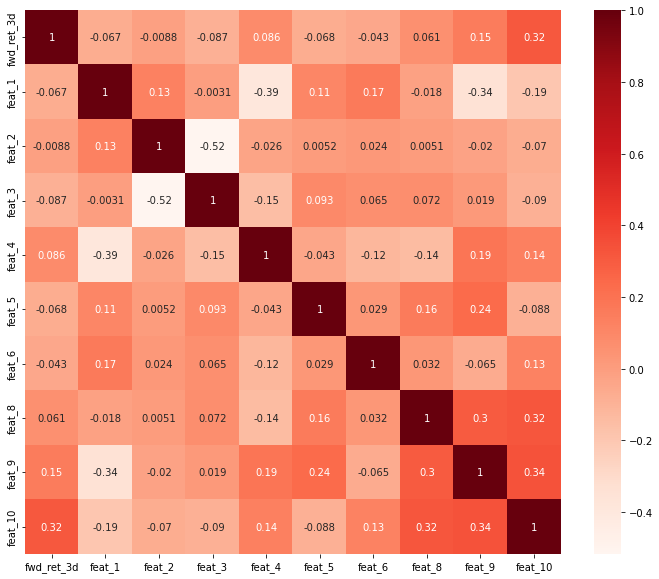

In [12]:
plt.figure(figsize=(12,10))
cor = df_coin_1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [13]:
cor_target = abs(cor["fwd_ret_3d"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

fwd_ret_3d    1.000000
feat_9        0.152662
feat_10       0.316289
Name: fwd_ret_3d, dtype: float64

In [14]:
relevant_features = cor_target[cor_target>0.1]
relevant_features

fwd_ret_3d    1.000000
feat_9        0.152662
feat_10       0.316289
Name: fwd_ret_3d, dtype: float64

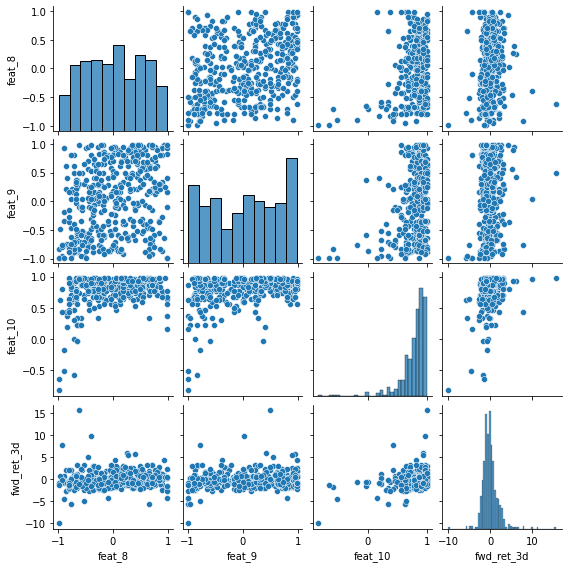

In [15]:
sns.pairplot(df_coin_1[['feat_8', 'feat_9', 'feat_10', 'fwd_ret_3d']], height=2.0)


In [16]:
# sns.pairplot(df[['feat_10', 'fwd_ret_3d']], height=2.0)

In [17]:
df_coin_1 = df_coin_1[['feat_9', 'feat_10', 'fwd_ret_3d']]
X = df_coin_1.drop(['fwd_ret_3d'], axis=1)
y = df_coin_1['fwd_ret_3d']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

imputer = SimpleImputer(strategy="mean").fit(X, y)
x_train = pd.DataFrame(imputer.transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(imputer.transform(x_test), columns=x_test.columns)

In [18]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures

poly_degree2 = 1
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()


polyreg_scaled=make_pipeline(PolynomialFeatures(poly_degree2),scaler,LinearRegression())
polyreg_scaled.fit(x_train,y_train)

regressor = Ridge()
regressor.fit(x_train, y_train)

Ridge()

In [19]:
y_pred = polyreg_scaled.predict(x_test)

In [20]:
print('LinearRegression:')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Accuracy (R2) of our model is {}%".format(round(r2_score(y_test, y_pred), 2) *100))

LinearRegression:
Mean Absolute Error: 1.272066992683768
Mean Squared Error: 3.4527054896178244
Root Mean Squared Error: 1.858145712697964
Accuracy (R2) of our model is 13.0%


In [21]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(random_state=1, max_iter=500).fit(x_train, y_train)
y_pred = regr.predict(x_test)

regr.score(x_test, y_test)

0.1338010249151077

In [22]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Accuracy (R2) of our model is {}%".format(round(r2_score(y_test, y_pred), 2) *100))

Mean Absolute Error: 1.2660484568094752
Mean Squared Error: 3.419407310770893
Root Mean Squared Error: 1.8491639491323892
Accuracy (R2) of our model is 13.0%


In [23]:
df_coin_1.shape
df_coin_1.head()

,feat_9,feat_10,fwd_ret_3d
date,,,
2021-01-01,NaN,NaN,-0.447641
2021-01-02,NaN,NaN,0.049248
2021-01-03,NaN,NaN,0.868574
2021-01-04,NaN,NaN,1.769486
2021-01-05,NaN,NaN,2.434087


In [24]:
import torch

X = df_coin_1.drop(['fwd_ret_3d'], axis=1)
y = df_coin_1['fwd_ret_3d']

print(y)
imputer = SimpleImputer(strategy="mean").fit(X, y)
X = pd.DataFrame(imputer.transform(X), columns=X.columns)

X['fwd_ret_3d'] = y.values
df_coin_1 = X

print()
print("PyTorch Version : {}".format(torch.__version__))

date
2021-01-01   -0.447641
2021-01-02    0.049248
2021-01-03    0.868574
2021-01-04    1.769486
2021-01-05    2.434087
                ...   
2022-07-15   -1.020909
2022-07-16   -1.160422
2022-07-17   -1.596880
2022-07-18   -0.855355
2022-07-19   -0.926825
Name: fwd_ret_3d, Length: 565, dtype: float64

PyTorch Version : 1.13.1+cu116


In [25]:
df_coin_1.head()

,feat_9,feat_10,fwd_ret_3d
0,0.046404,0.776068,-0.447641
1,0.046404,0.776068,0.049248
2,0.046404,0.776068,0.868574
3,0.046404,0.776068,1.769486
4,0.046404,0.776068,2.434087


In [211]:
import numpy as np

feature_cols = ['feat_9', 'feat_10']
target_col = 'fwd_ret_3d'

X = df_coin_1[feature_cols].values
Y = df_coin_1[target_col].values

n_features = X.shape[1]
lookback = 150

X_organized, Y_organized = [], []
for i in range(0, X.shape[0]-lookback, 1):
    X_organized.append(X[i:i+lookback])
    Y_organized.append(Y[i+lookback])

X_organized, Y_organized = np.array(X_organized), np.array(Y_organized)
X_organized, Y_organized = torch.tensor(X_organized, dtype=torch.float32), torch.tensor(Y_organized, dtype=torch.float32)
X_train, Y_train, X_test, Y_test = X_organized[:300], Y_organized[:300], X_organized[300:], Y_organized[300:]

X_organized.shape, Y_organized.shape, X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

(torch.Size([415, 150, 2]),
 torch.Size([415]),
 torch.Size([300, 150, 2]),
 torch.Size([300]),
 torch.Size([115, 150, 2]),
 torch.Size([115]))

In [212]:
mean, std = Y_train.mean(), Y_train.std()

print("Mean : {:.2f}, Standard Deviation : {:.2f}".format(mean, std))
Y_train_scaled, Y_test_scaled = (Y_train - mean)/std , (Y_test-mean)/std

X_train.shape, Y_train_scaled.shape, X_test.shape,  Y_test_scaled.shape

Mean : -0.11, Standard Deviation : 1.44


(torch.Size([300, 150, 2]),
 torch.Size([300]),
 torch.Size([115, 150, 2]),
 torch.Size([115]))

In [213]:
import gc

del X, Y

gc.collect()

258

In [214]:
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(X_train, Y_train_scaled)
test_dataset  = TensorDataset(X_test,  Y_test_scaled)

train_loader = DataLoader(train_dataset, shuffle=False, batch_size=32)
test_loader  = DataLoader(test_dataset,  shuffle=False, batch_size=32)

In [230]:
from torch import nn
from torch.nn import functional as F

hidden_dim = 32
n_layers=2

class LSTMRegressor(nn.Module):
    def __init__(self):
        super(LSTMRegressor, self).__init__()
        self.lstm = nn.LSTM(input_size=n_features, hidden_size=hidden_dim, num_layers=n_layers, batch_first=True)
        self.linear = nn.Linear(hidden_dim, 1)

    def forward(self, X_batch):
        hidden, carry = torch.randn(n_layers, len(X_batch), hidden_dim), torch.randn(n_layers, len(X_batch), hidden_dim)
        output, (hidden, carry) = self.lstm(X_batch, (hidden, carry))
        return self.linear(output[:,-1])

In [231]:
lstm_regressor = LSTMRegressor()

lstm_regressor

LSTMRegressor(
  (lstm): LSTM(2, 32, num_layers=2, batch_first=True)
  (linear): Linear(in_features=32, out_features=1, bias=True)
)

In [232]:
for layer in lstm_regressor.children():
    print("Layer : {}".format(layer))
    print("Parameters : ")
    for param in layer.parameters():
        print(param.shape)
    print()

Layer : LSTM(2, 32, num_layers=2, batch_first=True)
Parameters : 
torch.Size([128, 2])
torch.Size([128, 32])
torch.Size([128])
torch.Size([128])
torch.Size([128, 32])
torch.Size([128, 32])
torch.Size([128])
torch.Size([128])

Layer : Linear(in_features=32, out_features=1, bias=True)
Parameters : 
torch.Size([1, 32])
torch.Size([1])



In [233]:
out = lstm_regressor(torch.randn(100, lookback, n_features))

out.shape

torch.Size([100, 1])

In [234]:
from tqdm import tqdm
from sklearn.metrics import mean_squared_error
import gc

def CalcValLoss(model, loss_fn, val_loader):
    with torch.no_grad():
        losses = []
        for X, Y in val_loader:
            preds = model(X)
            loss = loss_fn(preds.ravel(), Y)
            losses.append(loss.item())
        print("Valid Loss : {:.3f}".format(torch.tensor(losses).mean()))

def TrainModel(model, loss_fn, optimizer, train_loader, val_loader, epochs=10):
    for i in range(1, epochs+1):
        losses = []
        for X, Y in tqdm(train_loader):
            Y_preds = model(X)

            loss = loss_fn(Y_preds.ravel(), Y)
            losses.append(loss.item())

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        print("Epoch : {}".format(i))
        print("Train Loss : {:.3f}".format(torch.tensor(losses).mean()))
        CalcValLoss(model, loss_fn, val_loader)

In [235]:
from torch.optim import Adam

epochs = 1000
learning_rate = 1e-3

loss_fn = nn.MSELoss()
lstm_regressor = LSTMRegressor()
optimizer = Adam(lstm_regressor.parameters(), lr=learning_rate)

TrainModel(lstm_regressor, loss_fn, optimizer, train_loader, test_loader, epochs)

100%|██████████| 10/10 [00:01<00:00,  9.15it/s]


Epoch : 1
Train Loss : 0.961
Valid Loss : 3.322


100%|██████████| 10/10 [00:01<00:00,  9.64it/s]


Epoch : 2
Train Loss : 0.943
Valid Loss : 3.302


100%|██████████| 10/10 [00:00<00:00, 10.76it/s]


Epoch : 3
Train Loss : 0.937
Valid Loss : 3.292


100%|██████████| 10/10 [00:00<00:00, 10.77it/s]


Epoch : 4
Train Loss : 0.936
Valid Loss : 3.286


100%|██████████| 10/10 [00:00<00:00, 10.66it/s]


Epoch : 5
Train Loss : 0.933
Valid Loss : 3.281


100%|██████████| 10/10 [00:00<00:00, 11.29it/s]


Epoch : 6
Train Loss : 0.929
Valid Loss : 3.276


100%|██████████| 10/10 [00:00<00:00, 11.34it/s]


Epoch : 7
Train Loss : 0.923
Valid Loss : 3.272


100%|██████████| 10/10 [00:00<00:00, 11.59it/s]


Epoch : 8
Train Loss : 0.915
Valid Loss : 3.273


100%|██████████| 10/10 [00:00<00:00, 11.78it/s]


Epoch : 9
Train Loss : 0.910
Valid Loss : 3.268


100%|██████████| 10/10 [00:00<00:00, 11.53it/s]


Epoch : 10
Train Loss : 0.903
Valid Loss : 3.259


100%|██████████| 10/10 [00:00<00:00, 11.47it/s]


Epoch : 11
Train Loss : 0.900
Valid Loss : 3.245


100%|██████████| 10/10 [00:00<00:00, 11.40it/s]


Epoch : 12
Train Loss : 0.897
Valid Loss : 3.233


100%|██████████| 10/10 [00:00<00:00, 11.20it/s]


Epoch : 13
Train Loss : 0.895
Valid Loss : 3.221


100%|██████████| 10/10 [00:00<00:00, 11.47it/s]


Epoch : 14
Train Loss : 0.892
Valid Loss : 3.208


100%|██████████| 10/10 [00:00<00:00, 11.41it/s]


Epoch : 15
Train Loss : 0.889
Valid Loss : 3.194


100%|██████████| 10/10 [00:00<00:00, 11.59it/s]


Epoch : 16
Train Loss : 0.885
Valid Loss : 3.178


100%|██████████| 10/10 [00:00<00:00, 11.61it/s]


Epoch : 17
Train Loss : 0.882
Valid Loss : 3.164


100%|██████████| 10/10 [00:00<00:00, 11.80it/s]


Epoch : 18
Train Loss : 0.878
Valid Loss : 3.152


100%|██████████| 10/10 [00:00<00:00, 11.31it/s]


Epoch : 19
Train Loss : 0.874
Valid Loss : 3.143


100%|██████████| 10/10 [00:00<00:00, 11.67it/s]


Epoch : 20
Train Loss : 0.869
Valid Loss : 3.139


100%|██████████| 10/10 [00:00<00:00, 11.73it/s]


Epoch : 21
Train Loss : 0.866
Valid Loss : 3.136


100%|██████████| 10/10 [00:00<00:00, 11.59it/s]


Epoch : 22
Train Loss : 0.862
Valid Loss : 3.134


100%|██████████| 10/10 [00:00<00:00, 11.69it/s]


Epoch : 23
Train Loss : 0.859
Valid Loss : 3.131


100%|██████████| 10/10 [00:00<00:00, 11.93it/s]


Epoch : 24
Train Loss : 0.856
Valid Loss : 3.129


100%|██████████| 10/10 [00:00<00:00, 11.84it/s]


Epoch : 25
Train Loss : 0.854
Valid Loss : 3.128


100%|██████████| 10/10 [00:00<00:00, 11.23it/s]


Epoch : 26
Train Loss : 0.852
Valid Loss : 3.127


100%|██████████| 10/10 [00:00<00:00, 11.40it/s]


Epoch : 27
Train Loss : 0.850
Valid Loss : 3.126


100%|██████████| 10/10 [00:00<00:00, 11.59it/s]


Epoch : 28
Train Loss : 0.849
Valid Loss : 3.126


100%|██████████| 10/10 [00:00<00:00, 11.67it/s]


Epoch : 29
Train Loss : 0.848
Valid Loss : 3.125


100%|██████████| 10/10 [00:00<00:00, 11.62it/s]


Epoch : 30
Train Loss : 0.847
Valid Loss : 3.124


100%|██████████| 10/10 [00:00<00:00, 11.72it/s]


Epoch : 31
Train Loss : 0.845
Valid Loss : 3.123


100%|██████████| 10/10 [00:00<00:00, 11.24it/s]


Epoch : 32
Train Loss : 0.844
Valid Loss : 3.122


100%|██████████| 10/10 [00:00<00:00, 11.50it/s]


Epoch : 33
Train Loss : 0.843
Valid Loss : 3.121


100%|██████████| 10/10 [00:00<00:00, 11.64it/s]


Epoch : 34
Train Loss : 0.842
Valid Loss : 3.120


100%|██████████| 10/10 [00:00<00:00, 11.27it/s]


Epoch : 35
Train Loss : 0.842
Valid Loss : 3.118


100%|██████████| 10/10 [00:00<00:00, 11.31it/s]


Epoch : 36
Train Loss : 0.840
Valid Loss : 3.117


100%|██████████| 10/10 [00:00<00:00, 10.63it/s]


Epoch : 37
Train Loss : 0.840
Valid Loss : 3.115


100%|██████████| 10/10 [00:00<00:00, 11.38it/s]


Epoch : 38
Train Loss : 0.838
Valid Loss : 3.115


100%|██████████| 10/10 [00:00<00:00, 11.65it/s]


Epoch : 39
Train Loss : 0.838
Valid Loss : 3.112


100%|██████████| 10/10 [00:00<00:00, 11.81it/s]


Epoch : 40
Train Loss : 0.836
Valid Loss : 3.113


100%|██████████| 10/10 [00:00<00:00, 11.61it/s]


Epoch : 41
Train Loss : 0.837
Valid Loss : 3.109


100%|██████████| 10/10 [00:00<00:00, 11.25it/s]


Epoch : 42
Train Loss : 0.834
Valid Loss : 3.114


100%|██████████| 10/10 [00:00<00:00, 11.02it/s]


Epoch : 43
Train Loss : 0.837
Valid Loss : 3.104


100%|██████████| 10/10 [00:00<00:00, 11.11it/s]


Epoch : 44
Train Loss : 0.832
Valid Loss : 3.120


100%|██████████| 10/10 [00:00<00:00, 11.08it/s]


Epoch : 45
Train Loss : 0.841
Valid Loss : 3.098


100%|██████████| 10/10 [00:00<00:00, 11.36it/s]


Epoch : 46
Train Loss : 0.839
Valid Loss : 3.122


100%|██████████| 10/10 [00:00<00:00, 11.35it/s]


Epoch : 47
Train Loss : 0.840
Valid Loss : 3.107


100%|██████████| 10/10 [00:00<00:00, 11.32it/s]


Epoch : 48
Train Loss : 0.832
Valid Loss : 3.118


100%|██████████| 10/10 [00:00<00:00, 11.42it/s]


Epoch : 49
Train Loss : 0.829
Valid Loss : 3.127


100%|██████████| 10/10 [00:00<00:00, 10.97it/s]


Epoch : 50
Train Loss : 0.825
Valid Loss : 3.135


100%|██████████| 10/10 [00:00<00:00, 11.30it/s]


Epoch : 51
Train Loss : 0.822
Valid Loss : 3.142


100%|██████████| 10/10 [00:00<00:00, 11.35it/s]


Epoch : 52
Train Loss : 0.820
Valid Loss : 3.152


100%|██████████| 10/10 [00:00<00:00, 11.34it/s]


Epoch : 53
Train Loss : 0.816
Valid Loss : 3.164


100%|██████████| 10/10 [00:00<00:00, 11.63it/s]


Epoch : 54
Train Loss : 0.812
Valid Loss : 3.175


100%|██████████| 10/10 [00:00<00:00, 11.68it/s]


Epoch : 55
Train Loss : 0.807
Valid Loss : 3.200


100%|██████████| 10/10 [00:00<00:00, 10.50it/s]


Epoch : 56
Train Loss : 0.802
Valid Loss : 3.194


100%|██████████| 10/10 [00:00<00:00, 11.59it/s]


Epoch : 57
Train Loss : 0.809
Valid Loss : 3.198


100%|██████████| 10/10 [00:00<00:00, 11.38it/s]


Epoch : 58
Train Loss : 0.866
Valid Loss : 3.160


100%|██████████| 10/10 [00:00<00:00, 11.39it/s]


Epoch : 59
Train Loss : 0.849
Valid Loss : 3.139


100%|██████████| 10/10 [00:00<00:00, 11.41it/s]


Epoch : 60
Train Loss : 0.837
Valid Loss : 3.157


100%|██████████| 10/10 [00:00<00:00, 11.39it/s]


Epoch : 61
Train Loss : 0.830
Valid Loss : 3.167


100%|██████████| 10/10 [00:00<00:00, 11.65it/s]


Epoch : 62
Train Loss : 0.821
Valid Loss : 3.184


100%|██████████| 10/10 [00:00<00:00, 11.75it/s]


Epoch : 63
Train Loss : 0.815
Valid Loss : 3.186


100%|██████████| 10/10 [00:00<00:00, 11.63it/s]


Epoch : 64
Train Loss : 0.810
Valid Loss : 3.195


100%|██████████| 10/10 [00:00<00:00, 11.59it/s]


Epoch : 65
Train Loss : 0.805
Valid Loss : 3.206


100%|██████████| 10/10 [00:00<00:00, 11.67it/s]


Epoch : 66
Train Loss : 0.801
Valid Loss : 3.217


100%|██████████| 10/10 [00:00<00:00, 11.38it/s]


Epoch : 67
Train Loss : 0.796
Valid Loss : 3.233


100%|██████████| 10/10 [00:00<00:00, 11.70it/s]


Epoch : 68
Train Loss : 0.791
Valid Loss : 3.235


100%|██████████| 10/10 [00:00<00:00, 10.85it/s]


Epoch : 69
Train Loss : 0.787
Valid Loss : 3.256


100%|██████████| 10/10 [00:00<00:00, 11.20it/s]


Epoch : 70
Train Loss : 0.787
Valid Loss : 3.169


100%|██████████| 10/10 [00:00<00:00, 11.37it/s]


Epoch : 71
Train Loss : 0.830
Valid Loss : 3.285


100%|██████████| 10/10 [00:00<00:00, 10.98it/s]


Epoch : 72
Train Loss : 0.862
Valid Loss : 3.193


100%|██████████| 10/10 [00:00<00:00, 11.36it/s]


Epoch : 73
Train Loss : 0.817
Valid Loss : 3.110


100%|██████████| 10/10 [00:00<00:00, 11.51it/s]


Epoch : 74
Train Loss : 0.814
Valid Loss : 3.140


100%|██████████| 10/10 [00:00<00:00, 11.48it/s]


Epoch : 75
Train Loss : 0.803
Valid Loss : 3.185


100%|██████████| 10/10 [00:00<00:00, 10.33it/s]


Epoch : 76
Train Loss : 0.791
Valid Loss : 3.178


100%|██████████| 10/10 [00:00<00:00, 11.57it/s]


Epoch : 77
Train Loss : 0.783
Valid Loss : 3.180


100%|██████████| 10/10 [00:00<00:00, 11.55it/s]


Epoch : 78
Train Loss : 0.779
Valid Loss : 3.199


100%|██████████| 10/10 [00:00<00:00, 10.85it/s]


Epoch : 79
Train Loss : 0.773
Valid Loss : 3.199


100%|██████████| 10/10 [00:00<00:00, 11.46it/s]


Epoch : 80
Train Loss : 0.770
Valid Loss : 3.203


100%|██████████| 10/10 [00:00<00:00, 11.21it/s]


Epoch : 81
Train Loss : 0.767
Valid Loss : 3.201


100%|██████████| 10/10 [00:00<00:00, 11.81it/s]


Epoch : 82
Train Loss : 0.762
Valid Loss : 3.213


100%|██████████| 10/10 [00:00<00:00, 11.74it/s]


Epoch : 83
Train Loss : 0.758
Valid Loss : 3.196


100%|██████████| 10/10 [00:00<00:00, 11.53it/s]


Epoch : 84
Train Loss : 0.754
Valid Loss : 3.234


100%|██████████| 10/10 [00:00<00:00, 11.44it/s]


Epoch : 85
Train Loss : 0.778
Valid Loss : 3.131


100%|██████████| 10/10 [00:00<00:00, 11.67it/s]


Epoch : 86
Train Loss : 0.855
Valid Loss : 3.205


100%|██████████| 10/10 [00:00<00:00, 11.60it/s]


Epoch : 87
Train Loss : 0.792
Valid Loss : 3.252


100%|██████████| 10/10 [00:00<00:00, 11.20it/s]


Epoch : 88
Train Loss : 0.823
Valid Loss : 3.133


100%|██████████| 10/10 [00:00<00:00, 10.67it/s]


Epoch : 89
Train Loss : 0.794
Valid Loss : 3.094


100%|██████████| 10/10 [00:00<00:00, 10.43it/s]


Epoch : 90
Train Loss : 0.767
Valid Loss : 3.121


100%|██████████| 10/10 [00:00<00:00, 11.15it/s]


Epoch : 91
Train Loss : 0.755
Valid Loss : 3.159


100%|██████████| 10/10 [00:00<00:00, 11.29it/s]


Epoch : 92
Train Loss : 0.738
Valid Loss : 3.152


100%|██████████| 10/10 [00:00<00:00, 11.10it/s]


Epoch : 93
Train Loss : 0.734
Valid Loss : 3.153


100%|██████████| 10/10 [00:00<00:00, 11.54it/s]


Epoch : 94
Train Loss : 0.733
Valid Loss : 3.150


100%|██████████| 10/10 [00:00<00:00, 11.41it/s]


Epoch : 95
Train Loss : 0.778
Valid Loss : 3.168


100%|██████████| 10/10 [00:00<00:00, 11.21it/s]


Epoch : 96
Train Loss : 0.791
Valid Loss : 3.227


100%|██████████| 10/10 [00:00<00:00, 10.83it/s]


Epoch : 97
Train Loss : 0.764
Valid Loss : 3.258


100%|██████████| 10/10 [00:00<00:00, 11.33it/s]


Epoch : 98
Train Loss : 0.804
Valid Loss : 3.256


100%|██████████| 10/10 [00:00<00:00, 10.68it/s]


Epoch : 99
Train Loss : 0.826
Valid Loss : 3.120


100%|██████████| 10/10 [00:00<00:00, 11.11it/s]


Epoch : 100
Train Loss : 0.816
Valid Loss : 3.086


100%|██████████| 10/10 [00:00<00:00, 11.51it/s]


Epoch : 101
Train Loss : 0.790
Valid Loss : 3.172


100%|██████████| 10/10 [00:00<00:00, 11.59it/s]


Epoch : 102
Train Loss : 0.771
Valid Loss : 3.187


100%|██████████| 10/10 [00:00<00:00, 11.36it/s]


Epoch : 103
Train Loss : 0.750
Valid Loss : 3.195


100%|██████████| 10/10 [00:00<00:00, 11.72it/s]


Epoch : 104
Train Loss : 0.734
Valid Loss : 3.196


100%|██████████| 10/10 [00:00<00:00, 10.93it/s]


Epoch : 105
Train Loss : 0.726
Valid Loss : 3.176


100%|██████████| 10/10 [00:00<00:00, 11.41it/s]


Epoch : 106
Train Loss : 0.720
Valid Loss : 3.158


100%|██████████| 10/10 [00:00<00:00, 11.55it/s]


Epoch : 107
Train Loss : 0.712
Valid Loss : 3.142


100%|██████████| 10/10 [00:00<00:00, 11.50it/s]


Epoch : 108
Train Loss : 0.705
Valid Loss : 3.129


100%|██████████| 10/10 [00:00<00:00, 11.47it/s]


Epoch : 109
Train Loss : 0.698
Valid Loss : 3.109


100%|██████████| 10/10 [00:00<00:00, 10.96it/s]


Epoch : 110
Train Loss : 0.690
Valid Loss : 3.101


100%|██████████| 10/10 [00:00<00:00, 11.07it/s]


Epoch : 111
Train Loss : 0.686
Valid Loss : 3.097


100%|██████████| 10/10 [00:00<00:00, 11.29it/s]


Epoch : 112
Train Loss : 0.703
Valid Loss : 3.146


100%|██████████| 10/10 [00:00<00:00, 11.52it/s]


Epoch : 113
Train Loss : 0.739
Valid Loss : 3.074


100%|██████████| 10/10 [00:00<00:00, 11.34it/s]


Epoch : 114
Train Loss : 0.819
Valid Loss : 3.080


100%|██████████| 10/10 [00:00<00:00, 10.86it/s]


Epoch : 115
Train Loss : 0.735
Valid Loss : 3.199


100%|██████████| 10/10 [00:00<00:00, 10.75it/s]


Epoch : 116
Train Loss : 0.731
Valid Loss : 3.087


100%|██████████| 10/10 [00:00<00:00, 11.03it/s]


Epoch : 117
Train Loss : 0.719
Valid Loss : 3.144


100%|██████████| 10/10 [00:00<00:00, 11.20it/s]


Epoch : 118
Train Loss : 0.731
Valid Loss : 3.090


100%|██████████| 10/10 [00:00<00:00, 11.40it/s]


Epoch : 119
Train Loss : 0.689
Valid Loss : 3.100


100%|██████████| 10/10 [00:00<00:00, 10.99it/s]


Epoch : 120
Train Loss : 0.673
Valid Loss : 3.144


100%|██████████| 10/10 [00:00<00:00, 11.04it/s]


Epoch : 121
Train Loss : 0.669
Valid Loss : 3.132


100%|██████████| 10/10 [00:00<00:00, 11.47it/s]


Epoch : 122
Train Loss : 0.661
Valid Loss : 3.108


100%|██████████| 10/10 [00:00<00:00, 11.40it/s]


Epoch : 123
Train Loss : 0.655
Valid Loss : 3.096


100%|██████████| 10/10 [00:00<00:00, 11.44it/s]


Epoch : 124
Train Loss : 0.654
Valid Loss : 3.107


100%|██████████| 10/10 [00:00<00:00, 11.21it/s]


Epoch : 125
Train Loss : 0.654
Valid Loss : 3.095


100%|██████████| 10/10 [00:00<00:00, 11.47it/s]


Epoch : 126
Train Loss : 0.718
Valid Loss : 3.287


100%|██████████| 10/10 [00:00<00:00, 11.53it/s]


Epoch : 127
Train Loss : 0.756
Valid Loss : 3.301


100%|██████████| 10/10 [00:00<00:00, 11.48it/s]


Epoch : 128
Train Loss : 0.766
Valid Loss : 3.018


100%|██████████| 10/10 [00:00<00:00, 11.26it/s]


Epoch : 129
Train Loss : 0.898
Valid Loss : 3.166


100%|██████████| 10/10 [00:00<00:00, 11.72it/s]


Epoch : 130
Train Loss : 0.851
Valid Loss : 3.155


100%|██████████| 10/10 [00:00<00:00, 11.05it/s]


Epoch : 131
Train Loss : 0.754
Valid Loss : 3.190


100%|██████████| 10/10 [00:00<00:00, 11.70it/s]


Epoch : 132
Train Loss : 0.705
Valid Loss : 3.252


100%|██████████| 10/10 [00:00<00:00, 11.32it/s]


Epoch : 133
Train Loss : 0.683
Valid Loss : 3.235


100%|██████████| 10/10 [00:00<00:00, 10.84it/s]


Epoch : 134
Train Loss : 0.665
Valid Loss : 3.221


100%|██████████| 10/10 [00:00<00:00, 10.50it/s]


Epoch : 135
Train Loss : 0.656
Valid Loss : 3.226


100%|██████████| 10/10 [00:00<00:00, 11.59it/s]


Epoch : 136
Train Loss : 0.649
Valid Loss : 3.227


100%|██████████| 10/10 [00:00<00:00, 11.54it/s]


Epoch : 137
Train Loss : 0.643
Valid Loss : 3.220


100%|██████████| 10/10 [00:00<00:00, 11.64it/s]


Epoch : 138
Train Loss : 0.637
Valid Loss : 3.212


100%|██████████| 10/10 [00:00<00:00, 11.58it/s]


Epoch : 139
Train Loss : 0.634
Valid Loss : 3.201


100%|██████████| 10/10 [00:00<00:00, 11.54it/s]


Epoch : 140
Train Loss : 0.629
Valid Loss : 3.208


100%|██████████| 10/10 [00:00<00:00, 10.92it/s]


Epoch : 141
Train Loss : 0.645
Valid Loss : 3.163


100%|██████████| 10/10 [00:00<00:00, 11.04it/s]


Epoch : 142
Train Loss : 0.640
Valid Loss : 3.176


100%|██████████| 10/10 [00:00<00:00, 11.61it/s]


Epoch : 143
Train Loss : 0.642
Valid Loss : 3.188


100%|██████████| 10/10 [00:00<00:00, 11.54it/s]


Epoch : 144
Train Loss : 0.623
Valid Loss : 3.192


100%|██████████| 10/10 [00:00<00:00, 10.82it/s]


Epoch : 145
Train Loss : 0.615
Valid Loss : 3.190


100%|██████████| 10/10 [00:00<00:00, 11.54it/s]


Epoch : 146
Train Loss : 0.613
Valid Loss : 3.183


100%|██████████| 10/10 [00:00<00:00, 11.61it/s]


Epoch : 147
Train Loss : 0.616
Valid Loss : 3.222


100%|██████████| 10/10 [00:00<00:00, 11.25it/s]


Epoch : 148
Train Loss : 0.613
Valid Loss : 3.227


100%|██████████| 10/10 [00:00<00:00, 11.30it/s]


Epoch : 149
Train Loss : 0.632
Valid Loss : 3.251


100%|██████████| 10/10 [00:00<00:00, 11.60it/s]


Epoch : 150
Train Loss : 0.606
Valid Loss : 3.205


100%|██████████| 10/10 [00:00<00:00, 11.40it/s]


Epoch : 151
Train Loss : 0.639
Valid Loss : 3.231


100%|██████████| 10/10 [00:00<00:00, 11.55it/s]


Epoch : 152
Train Loss : 0.631
Valid Loss : 3.239


100%|██████████| 10/10 [00:00<00:00, 10.95it/s]


Epoch : 153
Train Loss : 0.631
Valid Loss : 3.123


100%|██████████| 10/10 [00:00<00:00, 11.10it/s]


Epoch : 154
Train Loss : 0.626
Valid Loss : 3.139


100%|██████████| 10/10 [00:00<00:00, 10.87it/s]


Epoch : 155
Train Loss : 0.626
Valid Loss : 3.189


100%|██████████| 10/10 [00:00<00:00, 10.88it/s]


Epoch : 156
Train Loss : 0.590
Valid Loss : 3.310


100%|██████████| 10/10 [00:00<00:00, 11.09it/s]


Epoch : 157
Train Loss : 0.583
Valid Loss : 3.224


100%|██████████| 10/10 [00:00<00:00, 11.30it/s]


Epoch : 158
Train Loss : 0.571
Valid Loss : 3.190


100%|██████████| 10/10 [00:00<00:00, 11.26it/s]


Epoch : 159
Train Loss : 0.562
Valid Loss : 3.220


100%|██████████| 10/10 [00:00<00:00, 10.88it/s]


Epoch : 160
Train Loss : 0.556
Valid Loss : 3.261


100%|██████████| 10/10 [00:00<00:00, 11.35it/s]


Epoch : 161
Train Loss : 0.574
Valid Loss : 3.228


100%|██████████| 10/10 [00:00<00:00, 11.37it/s]


Epoch : 162
Train Loss : 0.555
Valid Loss : 3.136


100%|██████████| 10/10 [00:00<00:00, 11.10it/s]


Epoch : 163
Train Loss : 0.604
Valid Loss : 3.320


100%|██████████| 10/10 [00:00<00:00, 10.71it/s]


Epoch : 164
Train Loss : 0.584
Valid Loss : 3.114


100%|██████████| 10/10 [00:00<00:00, 11.16it/s]


Epoch : 165
Train Loss : 0.567
Valid Loss : 3.314


100%|██████████| 10/10 [00:00<00:00, 11.40it/s]


Epoch : 166
Train Loss : 0.563
Valid Loss : 3.321


100%|██████████| 10/10 [00:00<00:00, 11.45it/s]


Epoch : 167
Train Loss : 0.577
Valid Loss : 3.397


100%|██████████| 10/10 [00:00<00:00, 11.39it/s]


Epoch : 168
Train Loss : 0.581
Valid Loss : 3.310


100%|██████████| 10/10 [00:00<00:00, 11.24it/s]


Epoch : 169
Train Loss : 0.580
Valid Loss : 3.294


100%|██████████| 10/10 [00:00<00:00, 11.34it/s]


Epoch : 170
Train Loss : 0.616
Valid Loss : 3.175


100%|██████████| 10/10 [00:00<00:00, 11.51it/s]


Epoch : 171
Train Loss : 0.640
Valid Loss : 3.394


100%|██████████| 10/10 [00:00<00:00, 11.04it/s]


Epoch : 172
Train Loss : 0.616
Valid Loss : 3.393


100%|██████████| 10/10 [00:00<00:00, 11.44it/s]


Epoch : 173
Train Loss : 0.577
Valid Loss : 3.416


100%|██████████| 10/10 [00:00<00:00, 11.31it/s]


Epoch : 174
Train Loss : 0.538
Valid Loss : 3.327


100%|██████████| 10/10 [00:00<00:00, 11.15it/s]


Epoch : 175
Train Loss : 0.540
Valid Loss : 3.282


100%|██████████| 10/10 [00:00<00:00, 11.22it/s]


Epoch : 176
Train Loss : 0.538
Valid Loss : 3.390


100%|██████████| 10/10 [00:00<00:00, 11.16it/s]


Epoch : 177
Train Loss : 0.524
Valid Loss : 3.302


100%|██████████| 10/10 [00:00<00:00, 11.23it/s]


Epoch : 178
Train Loss : 0.507
Valid Loss : 3.431


100%|██████████| 10/10 [00:00<00:00, 11.37it/s]


Epoch : 179
Train Loss : 0.544
Valid Loss : 3.441


100%|██████████| 10/10 [00:00<00:00, 11.01it/s]


Epoch : 180
Train Loss : 0.534
Valid Loss : 3.308


100%|██████████| 10/10 [00:00<00:00, 11.43it/s]


Epoch : 181
Train Loss : 0.534
Valid Loss : 3.377


100%|██████████| 10/10 [00:00<00:00, 11.35it/s]


Epoch : 182
Train Loss : 0.604
Valid Loss : 3.150


100%|██████████| 10/10 [00:00<00:00, 11.36it/s]


Epoch : 183
Train Loss : 0.595
Valid Loss : 3.350


100%|██████████| 10/10 [00:00<00:00, 10.85it/s]


Epoch : 184
Train Loss : 0.585
Valid Loss : 3.185


100%|██████████| 10/10 [00:00<00:00, 10.55it/s]


Epoch : 185
Train Loss : 0.530
Valid Loss : 3.438


100%|██████████| 10/10 [00:00<00:00, 10.45it/s]


Epoch : 186
Train Loss : 0.642
Valid Loss : 3.255


100%|██████████| 10/10 [00:00<00:00, 11.43it/s]


Epoch : 187
Train Loss : 0.596
Valid Loss : 3.378


100%|██████████| 10/10 [00:00<00:00, 11.28it/s]


Epoch : 188
Train Loss : 0.559
Valid Loss : 3.371


100%|██████████| 10/10 [00:00<00:00, 10.58it/s]


Epoch : 189
Train Loss : 0.523
Valid Loss : 3.432


100%|██████████| 10/10 [00:01<00:00,  9.40it/s]


Epoch : 190
Train Loss : 0.503
Valid Loss : 3.295


100%|██████████| 10/10 [00:01<00:00,  7.54it/s]


Epoch : 191
Train Loss : 0.491
Valid Loss : 3.422


100%|██████████| 10/10 [00:00<00:00, 11.49it/s]


Epoch : 192
Train Loss : 0.483
Valid Loss : 3.489


100%|██████████| 10/10 [00:00<00:00, 11.53it/s]


Epoch : 193
Train Loss : 0.489
Valid Loss : 3.306


100%|██████████| 10/10 [00:00<00:00, 11.19it/s]


Epoch : 194
Train Loss : 0.484
Valid Loss : 3.539


100%|██████████| 10/10 [00:00<00:00, 11.53it/s]


Epoch : 195
Train Loss : 0.485
Valid Loss : 3.447


100%|██████████| 10/10 [00:00<00:00, 11.57it/s]


Epoch : 196
Train Loss : 0.502
Valid Loss : 3.478


100%|██████████| 10/10 [00:00<00:00, 11.51it/s]


Epoch : 197
Train Loss : 0.504
Valid Loss : 3.509


100%|██████████| 10/10 [00:00<00:00, 11.67it/s]


Epoch : 198
Train Loss : 0.561
Valid Loss : 3.097


100%|██████████| 10/10 [00:00<00:00, 11.40it/s]


Epoch : 199
Train Loss : 0.567
Valid Loss : 3.108


100%|██████████| 10/10 [00:00<00:00, 11.39it/s]


Epoch : 200
Train Loss : 0.515
Valid Loss : 3.466


100%|██████████| 10/10 [00:00<00:00, 11.44it/s]


Epoch : 201
Train Loss : 0.490
Valid Loss : 3.584


100%|██████████| 10/10 [00:00<00:00, 11.23it/s]


Epoch : 202
Train Loss : 0.495
Valid Loss : 3.548


100%|██████████| 10/10 [00:00<00:00, 11.32it/s]


Epoch : 203
Train Loss : 0.477
Valid Loss : 3.598


100%|██████████| 10/10 [00:00<00:00, 11.14it/s]


Epoch : 204
Train Loss : 0.467
Valid Loss : 3.499


100%|██████████| 10/10 [00:00<00:00, 11.49it/s]


Epoch : 205
Train Loss : 0.477
Valid Loss : 3.600


100%|██████████| 10/10 [00:00<00:00, 11.38it/s]


Epoch : 206
Train Loss : 0.463
Valid Loss : 3.490


100%|██████████| 10/10 [00:00<00:00, 10.87it/s]


Epoch : 207
Train Loss : 0.475
Valid Loss : 3.589


100%|██████████| 10/10 [00:00<00:00, 11.29it/s]


Epoch : 208
Train Loss : 0.479
Valid Loss : 3.560


100%|██████████| 10/10 [00:00<00:00, 11.43it/s]


Epoch : 209
Train Loss : 0.494
Valid Loss : 3.497


100%|██████████| 10/10 [00:00<00:00, 11.50it/s]


Epoch : 210
Train Loss : 0.482
Valid Loss : 3.468


100%|██████████| 10/10 [00:00<00:00, 11.27it/s]


Epoch : 211
Train Loss : 0.454
Valid Loss : 3.588


100%|██████████| 10/10 [00:00<00:00, 11.50it/s]


Epoch : 212
Train Loss : 0.450
Valid Loss : 3.686


100%|██████████| 10/10 [00:00<00:00, 11.42it/s]


Epoch : 213
Train Loss : 0.440
Valid Loss : 3.660


100%|██████████| 10/10 [00:00<00:00, 11.54it/s]


Epoch : 214
Train Loss : 0.448
Valid Loss : 3.622


100%|██████████| 10/10 [00:00<00:00, 11.01it/s]


Epoch : 215
Train Loss : 0.441
Valid Loss : 3.473


100%|██████████| 10/10 [00:00<00:00, 11.48it/s]


Epoch : 216
Train Loss : 0.443
Valid Loss : 3.563


100%|██████████| 10/10 [00:00<00:00, 10.35it/s]


Epoch : 217
Train Loss : 0.419
Valid Loss : 3.689


100%|██████████| 10/10 [00:00<00:00, 11.55it/s]


Epoch : 218
Train Loss : 0.419
Valid Loss : 3.668


100%|██████████| 10/10 [00:00<00:00, 11.65it/s]


Epoch : 219
Train Loss : 0.423
Valid Loss : 3.671


100%|██████████| 10/10 [00:00<00:00, 11.68it/s]


Epoch : 220
Train Loss : 0.428
Valid Loss : 3.735


100%|██████████| 10/10 [00:00<00:00, 11.44it/s]


Epoch : 221
Train Loss : 0.440
Valid Loss : 3.783


100%|██████████| 10/10 [00:00<00:00, 11.37it/s]


Epoch : 222
Train Loss : 0.524
Valid Loss : 3.240


100%|██████████| 10/10 [00:00<00:00, 11.31it/s]


Epoch : 223
Train Loss : 0.521
Valid Loss : 3.592


100%|██████████| 10/10 [00:00<00:00, 11.19it/s]


Epoch : 224
Train Loss : 0.572
Valid Loss : 3.775


100%|██████████| 10/10 [00:00<00:00, 11.20it/s]


Epoch : 225
Train Loss : 0.517
Valid Loss : 3.727


100%|██████████| 10/10 [00:00<00:00, 11.46it/s]


Epoch : 226
Train Loss : 0.476
Valid Loss : 3.610


100%|██████████| 10/10 [00:00<00:00, 11.34it/s]


Epoch : 227
Train Loss : 0.502
Valid Loss : 3.657


100%|██████████| 10/10 [00:00<00:00, 11.38it/s]


Epoch : 228
Train Loss : 0.517
Valid Loss : 3.781


100%|██████████| 10/10 [00:00<00:00, 11.40it/s]


Epoch : 229
Train Loss : 0.466
Valid Loss : 3.733


100%|██████████| 10/10 [00:00<00:00, 11.24it/s]


Epoch : 230
Train Loss : 0.429
Valid Loss : 3.768


100%|██████████| 10/10 [00:00<00:00, 11.04it/s]


Epoch : 231
Train Loss : 0.426
Valid Loss : 3.813


100%|██████████| 10/10 [00:00<00:00, 11.21it/s]


Epoch : 232
Train Loss : 0.421
Valid Loss : 3.844


100%|██████████| 10/10 [00:00<00:00, 11.44it/s]


Epoch : 233
Train Loss : 0.420
Valid Loss : 3.889


100%|██████████| 10/10 [00:00<00:00, 10.86it/s]


Epoch : 234
Train Loss : 0.425
Valid Loss : 3.915


100%|██████████| 10/10 [00:00<00:00, 11.33it/s]


Epoch : 235
Train Loss : 0.432
Valid Loss : 3.882


100%|██████████| 10/10 [00:00<00:00, 10.96it/s]


Epoch : 236
Train Loss : 0.457
Valid Loss : 4.002


100%|██████████| 10/10 [00:00<00:00, 11.13it/s]


Epoch : 237
Train Loss : 0.442
Valid Loss : 3.878


100%|██████████| 10/10 [00:00<00:00, 11.34it/s]


Epoch : 238
Train Loss : 0.430
Valid Loss : 4.027


100%|██████████| 10/10 [00:00<00:00, 10.94it/s]


Epoch : 239
Train Loss : 0.415
Valid Loss : 3.899


100%|██████████| 10/10 [00:00<00:00, 11.49it/s]


Epoch : 240
Train Loss : 0.399
Valid Loss : 3.948


100%|██████████| 10/10 [00:00<00:00, 11.35it/s]


Epoch : 241
Train Loss : 0.384
Valid Loss : 4.036


100%|██████████| 10/10 [00:00<00:00, 11.53it/s]


Epoch : 242
Train Loss : 0.397
Valid Loss : 3.927


100%|██████████| 10/10 [00:00<00:00, 11.51it/s]


Epoch : 243
Train Loss : 0.400
Valid Loss : 4.146


100%|██████████| 10/10 [00:00<00:00, 11.43it/s]


Epoch : 244
Train Loss : 0.410
Valid Loss : 3.930


100%|██████████| 10/10 [00:00<00:00, 11.31it/s]


Epoch : 245
Train Loss : 0.399
Valid Loss : 3.985


100%|██████████| 10/10 [00:00<00:00, 10.77it/s]


Epoch : 246
Train Loss : 0.387
Valid Loss : 4.000


100%|██████████| 10/10 [00:00<00:00, 11.15it/s]


Epoch : 247
Train Loss : 0.426
Valid Loss : 4.033


100%|██████████| 10/10 [00:00<00:00, 11.18it/s]


Epoch : 248
Train Loss : 0.490
Valid Loss : 3.887


100%|██████████| 10/10 [00:00<00:00, 10.81it/s]


Epoch : 249
Train Loss : 0.482
Valid Loss : 3.894


100%|██████████| 10/10 [00:01<00:00,  9.69it/s]


Epoch : 250
Train Loss : 0.431
Valid Loss : 4.049


100%|██████████| 10/10 [00:00<00:00, 11.00it/s]


Epoch : 251
Train Loss : 0.424
Valid Loss : 4.155


100%|██████████| 10/10 [00:00<00:00, 11.19it/s]


Epoch : 252
Train Loss : 0.442
Valid Loss : 3.881


100%|██████████| 10/10 [00:00<00:00, 11.38it/s]


Epoch : 253
Train Loss : 0.435
Valid Loss : 4.082


100%|██████████| 10/10 [00:00<00:00, 11.21it/s]


Epoch : 254
Train Loss : 0.396
Valid Loss : 4.013


100%|██████████| 10/10 [00:00<00:00, 10.79it/s]


Epoch : 255
Train Loss : 0.428
Valid Loss : 4.096


100%|██████████| 10/10 [00:00<00:00, 11.19it/s]


Epoch : 256
Train Loss : 0.398
Valid Loss : 4.005


100%|██████████| 10/10 [00:00<00:00, 11.38it/s]


Epoch : 257
Train Loss : 0.389
Valid Loss : 4.089


100%|██████████| 10/10 [00:00<00:00, 11.35it/s]


Epoch : 258
Train Loss : 0.371
Valid Loss : 4.041


100%|██████████| 10/10 [00:00<00:00, 11.22it/s]


Epoch : 259
Train Loss : 0.353
Valid Loss : 4.137


100%|██████████| 10/10 [00:00<00:00, 11.22it/s]


Epoch : 260
Train Loss : 0.348
Valid Loss : 4.106


100%|██████████| 10/10 [00:00<00:00, 11.42it/s]


Epoch : 261
Train Loss : 0.342
Valid Loss : 4.140


100%|██████████| 10/10 [00:00<00:00, 11.40it/s]


Epoch : 262
Train Loss : 0.336
Valid Loss : 4.164


100%|██████████| 10/10 [00:00<00:00, 11.15it/s]


Epoch : 263
Train Loss : 0.336
Valid Loss : 4.149


100%|██████████| 10/10 [00:00<00:00, 11.41it/s]


Epoch : 264
Train Loss : 0.340
Valid Loss : 4.123


100%|██████████| 10/10 [00:00<00:00, 11.44it/s]


Epoch : 265
Train Loss : 0.353
Valid Loss : 4.136


100%|██████████| 10/10 [00:00<00:00, 11.43it/s]


Epoch : 266
Train Loss : 0.395
Valid Loss : 4.072


100%|██████████| 10/10 [00:00<00:00, 11.02it/s]


Epoch : 267
Train Loss : 0.465
Valid Loss : 3.395


100%|██████████| 10/10 [00:00<00:00, 10.99it/s]


Epoch : 268
Train Loss : 0.410
Valid Loss : 3.899


100%|██████████| 10/10 [00:00<00:00, 10.82it/s]


Epoch : 269
Train Loss : 0.404
Valid Loss : 3.338


100%|██████████| 10/10 [00:00<00:00, 11.20it/s]


Epoch : 270
Train Loss : 0.376
Valid Loss : 4.084


100%|██████████| 10/10 [00:00<00:00, 11.54it/s]


Epoch : 271
Train Loss : 0.345
Valid Loss : 4.076


100%|██████████| 10/10 [00:00<00:00, 11.00it/s]


Epoch : 272
Train Loss : 0.353
Valid Loss : 4.080


100%|██████████| 10/10 [00:00<00:00, 11.44it/s]


Epoch : 273
Train Loss : 0.364
Valid Loss : 3.930


100%|██████████| 10/10 [00:00<00:00, 10.14it/s]


Epoch : 274
Train Loss : 0.364
Valid Loss : 4.101


100%|██████████| 10/10 [00:00<00:00, 11.47it/s]


Epoch : 275
Train Loss : 0.425
Valid Loss : 3.808


100%|██████████| 10/10 [00:00<00:00, 11.45it/s]


Epoch : 276
Train Loss : 0.401
Valid Loss : 4.119


100%|██████████| 10/10 [00:01<00:00,  9.21it/s]


Epoch : 277
Train Loss : 0.400
Valid Loss : 3.280


100%|██████████| 10/10 [00:00<00:00, 10.90it/s]


Epoch : 278
Train Loss : 0.360
Valid Loss : 4.191


100%|██████████| 10/10 [00:00<00:00, 11.27it/s]


Epoch : 279
Train Loss : 0.348
Valid Loss : 3.881


100%|██████████| 10/10 [00:00<00:00, 10.85it/s]


Epoch : 280
Train Loss : 0.340
Valid Loss : 3.557


100%|██████████| 10/10 [00:00<00:00, 11.50it/s]


Epoch : 281
Train Loss : 0.332
Valid Loss : 4.184


100%|██████████| 10/10 [00:00<00:00, 11.23it/s]


Epoch : 282
Train Loss : 0.327
Valid Loss : 3.430


100%|██████████| 10/10 [00:00<00:00, 11.33it/s]


Epoch : 283
Train Loss : 0.321
Valid Loss : 4.190


100%|██████████| 10/10 [00:00<00:00, 11.51it/s]


Epoch : 284
Train Loss : 0.322
Valid Loss : 3.591


100%|██████████| 10/10 [00:00<00:00, 10.94it/s]


Epoch : 285
Train Loss : 0.324
Valid Loss : 4.175


100%|██████████| 10/10 [00:00<00:00, 11.41it/s]


Epoch : 286
Train Loss : 0.334
Valid Loss : 3.350


100%|██████████| 10/10 [00:00<00:00, 11.30it/s]


Epoch : 287
Train Loss : 0.332
Valid Loss : 4.246


100%|██████████| 10/10 [00:00<00:00, 11.31it/s]


Epoch : 288
Train Loss : 0.347
Valid Loss : 3.233


100%|██████████| 10/10 [00:00<00:00, 11.29it/s]


Epoch : 289
Train Loss : 0.342
Valid Loss : 4.288


100%|██████████| 10/10 [00:00<00:00, 10.70it/s]


Epoch : 290
Train Loss : 0.337
Valid Loss : 3.322


100%|██████████| 10/10 [00:00<00:00, 10.91it/s]


Epoch : 291
Train Loss : 0.346
Valid Loss : 4.253


100%|██████████| 10/10 [00:00<00:00, 11.35it/s]


Epoch : 292
Train Loss : 0.346
Valid Loss : 3.571


100%|██████████| 10/10 [00:00<00:00, 11.03it/s]


Epoch : 293
Train Loss : 0.355
Valid Loss : 3.841


100%|██████████| 10/10 [00:00<00:00, 11.00it/s]


Epoch : 294
Train Loss : 0.337
Valid Loss : 4.231


100%|██████████| 10/10 [00:00<00:00, 11.46it/s]


Epoch : 295
Train Loss : 0.318
Valid Loss : 4.112


100%|██████████| 10/10 [00:00<00:00, 11.46it/s]


Epoch : 296
Train Loss : 0.302
Valid Loss : 4.139


100%|██████████| 10/10 [00:00<00:00, 11.11it/s]


Epoch : 297
Train Loss : 0.293
Valid Loss : 4.182


100%|██████████| 10/10 [00:00<00:00, 11.04it/s]


Epoch : 298
Train Loss : 0.286
Valid Loss : 3.992


100%|██████████| 10/10 [00:00<00:00, 11.45it/s]


Epoch : 299
Train Loss : 0.286
Valid Loss : 4.200


100%|██████████| 10/10 [00:00<00:00, 11.35it/s]


Epoch : 300
Train Loss : 0.284
Valid Loss : 4.102


100%|██████████| 10/10 [00:00<00:00, 10.90it/s]


Epoch : 301
Train Loss : 0.309
Valid Loss : 4.065


100%|██████████| 10/10 [00:00<00:00, 11.34it/s]


Epoch : 302
Train Loss : 0.304
Valid Loss : 4.124


100%|██████████| 10/10 [00:00<00:00, 11.45it/s]


Epoch : 303
Train Loss : 0.302
Valid Loss : 4.117


100%|██████████| 10/10 [00:00<00:00, 11.44it/s]


Epoch : 304
Train Loss : 0.293
Valid Loss : 4.220


100%|██████████| 10/10 [00:00<00:00, 11.32it/s]


Epoch : 305
Train Loss : 0.280
Valid Loss : 4.229


100%|██████████| 10/10 [00:00<00:00, 11.49it/s]


Epoch : 306
Train Loss : 0.277
Valid Loss : 4.143


100%|██████████| 10/10 [00:00<00:00, 11.44it/s]


Epoch : 307
Train Loss : 0.280
Valid Loss : 4.113


100%|██████████| 10/10 [00:00<00:00, 11.20it/s]


Epoch : 308
Train Loss : 0.310
Valid Loss : 4.359


100%|██████████| 10/10 [00:00<00:00, 11.53it/s]


Epoch : 309
Train Loss : 0.320
Valid Loss : 3.631


100%|██████████| 10/10 [00:00<00:00, 11.52it/s]


Epoch : 310
Train Loss : 0.396
Valid Loss : 4.403


100%|██████████| 10/10 [00:00<00:00, 11.68it/s]


Epoch : 311
Train Loss : 0.349
Valid Loss : 4.180


100%|██████████| 10/10 [00:00<00:00, 11.54it/s]


Epoch : 312
Train Loss : 0.311
Valid Loss : 3.825


100%|██████████| 10/10 [00:00<00:00, 10.39it/s]


Epoch : 313
Train Loss : 0.285
Valid Loss : 3.208


100%|██████████| 10/10 [00:00<00:00, 11.61it/s]


Epoch : 314
Train Loss : 0.300
Valid Loss : 4.518


100%|██████████| 10/10 [00:00<00:00, 11.28it/s]


Epoch : 315
Train Loss : 0.300
Valid Loss : 3.045


100%|██████████| 10/10 [00:00<00:00, 11.46it/s]


Epoch : 316
Train Loss : 0.273
Valid Loss : 3.620


100%|██████████| 10/10 [00:00<00:00, 11.33it/s]


Epoch : 317
Train Loss : 0.266
Valid Loss : 4.218


100%|██████████| 10/10 [00:00<00:00, 11.32it/s]


Epoch : 318
Train Loss : 0.267
Valid Loss : 3.051


100%|██████████| 10/10 [00:00<00:00, 11.27it/s]


Epoch : 319
Train Loss : 0.282
Valid Loss : 4.234


100%|██████████| 10/10 [00:00<00:00, 11.42it/s]


Epoch : 320
Train Loss : 0.292
Valid Loss : 3.832


100%|██████████| 10/10 [00:00<00:00, 11.46it/s]


Epoch : 321
Train Loss : 0.274
Valid Loss : 3.568


100%|██████████| 10/10 [00:00<00:00, 11.00it/s]


Epoch : 322
Train Loss : 0.258
Valid Loss : 4.010


100%|██████████| 10/10 [00:00<00:00, 11.07it/s]


Epoch : 323
Train Loss : 0.258
Valid Loss : 3.933


100%|██████████| 10/10 [00:00<00:00, 11.34it/s]


Epoch : 324
Train Loss : 0.268
Valid Loss : 4.001


100%|██████████| 10/10 [00:00<00:00, 11.34it/s]


Epoch : 325
Train Loss : 0.260
Valid Loss : 3.224


100%|██████████| 10/10 [00:00<00:00, 11.10it/s]


Epoch : 326
Train Loss : 0.257
Valid Loss : 4.492


100%|██████████| 10/10 [00:00<00:00, 11.45it/s]


Epoch : 327
Train Loss : 0.254
Valid Loss : 3.289


100%|██████████| 10/10 [00:00<00:00, 11.37it/s]


Epoch : 328
Train Loss : 0.261
Valid Loss : 4.573


100%|██████████| 10/10 [00:00<00:00, 11.19it/s]


Epoch : 329
Train Loss : 0.319
Valid Loss : 3.261


100%|██████████| 10/10 [00:00<00:00, 11.11it/s]


Epoch : 330
Train Loss : 0.355
Valid Loss : 4.621


100%|██████████| 10/10 [00:00<00:00, 11.30it/s]


Epoch : 331
Train Loss : 0.549
Valid Loss : 4.744


100%|██████████| 10/10 [00:00<00:00, 11.18it/s]


Epoch : 332
Train Loss : 0.682
Valid Loss : 4.382


100%|██████████| 10/10 [00:00<00:00, 10.86it/s]


Epoch : 333
Train Loss : 0.591
Valid Loss : 4.141


100%|██████████| 10/10 [00:00<00:00, 11.23it/s]


Epoch : 334
Train Loss : 0.544
Valid Loss : 3.968


100%|██████████| 10/10 [00:00<00:00, 11.23it/s]


Epoch : 335
Train Loss : 0.438
Valid Loss : 3.466


100%|██████████| 10/10 [00:00<00:00, 11.28it/s]


Epoch : 336
Train Loss : 0.360
Valid Loss : 3.701


100%|██████████| 10/10 [00:00<00:00, 11.20it/s]


Epoch : 337
Train Loss : 0.320
Valid Loss : 3.681


100%|██████████| 10/10 [00:00<00:00, 11.06it/s]


Epoch : 338
Train Loss : 0.296
Valid Loss : 3.798


100%|██████████| 10/10 [00:00<00:00, 10.89it/s]


Epoch : 339
Train Loss : 0.284
Valid Loss : 4.002


100%|██████████| 10/10 [00:00<00:00, 11.04it/s]


Epoch : 340
Train Loss : 0.276
Valid Loss : 4.215


100%|██████████| 10/10 [00:00<00:00, 10.86it/s]


Epoch : 341
Train Loss : 0.269
Valid Loss : 4.100


100%|██████████| 10/10 [00:00<00:00, 11.22it/s]


Epoch : 342
Train Loss : 0.267
Valid Loss : 4.157


100%|██████████| 10/10 [00:00<00:00, 11.37it/s]


Epoch : 343
Train Loss : 0.275
Valid Loss : 4.134


100%|██████████| 10/10 [00:00<00:00, 11.50it/s]


Epoch : 344
Train Loss : 0.289
Valid Loss : 4.033


100%|██████████| 10/10 [00:00<00:00, 11.53it/s]


Epoch : 345
Train Loss : 0.286
Valid Loss : 4.373


100%|██████████| 10/10 [00:00<00:00, 11.57it/s]


Epoch : 346
Train Loss : 0.288
Valid Loss : 4.213


100%|██████████| 10/10 [00:00<00:00, 11.25it/s]


Epoch : 347
Train Loss : 0.272
Valid Loss : 3.433


100%|██████████| 10/10 [00:00<00:00, 11.33it/s]


Epoch : 348
Train Loss : 0.262
Valid Loss : 4.216


100%|██████████| 10/10 [00:00<00:00, 11.27it/s]


Epoch : 349
Train Loss : 0.245
Valid Loss : 3.976


100%|██████████| 10/10 [00:00<00:00, 11.08it/s]


Epoch : 350
Train Loss : 0.244
Valid Loss : 4.086


100%|██████████| 10/10 [00:00<00:00, 11.16it/s]


Epoch : 351
Train Loss : 0.237
Valid Loss : 4.131


100%|██████████| 10/10 [00:00<00:00, 11.31it/s]


Epoch : 352
Train Loss : 0.250
Valid Loss : 4.070


100%|██████████| 10/10 [00:00<00:00, 10.79it/s]


Epoch : 353
Train Loss : 0.295
Valid Loss : 4.045


100%|██████████| 10/10 [00:00<00:00, 11.13it/s]


Epoch : 354
Train Loss : 0.344
Valid Loss : 3.052


100%|██████████| 10/10 [00:00<00:00, 11.22it/s]


Epoch : 355
Train Loss : 0.369
Valid Loss : 4.708


100%|██████████| 10/10 [00:00<00:00, 11.31it/s]


Epoch : 356
Train Loss : 0.307
Valid Loss : 3.761


100%|██████████| 10/10 [00:00<00:00, 11.04it/s]


Epoch : 357
Train Loss : 0.301
Valid Loss : 4.534


100%|██████████| 10/10 [00:00<00:00, 10.89it/s]


Epoch : 358
Train Loss : 0.267
Valid Loss : 2.896


100%|██████████| 10/10 [00:00<00:00, 11.05it/s]


Epoch : 359
Train Loss : 0.237
Valid Loss : 4.066


100%|██████████| 10/10 [00:00<00:00, 11.08it/s]


Epoch : 360
Train Loss : 0.220
Valid Loss : 3.397


100%|██████████| 10/10 [00:00<00:00, 11.48it/s]


Epoch : 361
Train Loss : 0.870
Valid Loss : 4.074


100%|██████████| 10/10 [00:00<00:00, 11.20it/s]


Epoch : 362
Train Loss : 1.315
Valid Loss : 3.305


100%|██████████| 10/10 [00:00<00:00, 11.35it/s]


Epoch : 363
Train Loss : 1.276
Valid Loss : 3.554


100%|██████████| 10/10 [00:00<00:00, 11.18it/s]


Epoch : 364
Train Loss : 0.974
Valid Loss : 3.293


100%|██████████| 10/10 [00:00<00:00, 11.24it/s]


Epoch : 365
Train Loss : 0.963
Valid Loss : 3.292


100%|██████████| 10/10 [00:00<00:00, 11.35it/s]


Epoch : 366
Train Loss : 0.948
Valid Loss : 3.302


100%|██████████| 10/10 [00:00<00:00, 11.22it/s]


Epoch : 367
Train Loss : 0.938
Valid Loss : 3.285


100%|██████████| 10/10 [00:00<00:00, 11.15it/s]


Epoch : 368
Train Loss : 0.942
Valid Loss : 3.289


100%|██████████| 10/10 [00:00<00:00, 11.43it/s]


Epoch : 369
Train Loss : 0.941
Valid Loss : 3.292


100%|██████████| 10/10 [00:00<00:00, 11.55it/s]


Epoch : 370
Train Loss : 0.939
Valid Loss : 3.288


100%|██████████| 10/10 [00:00<00:00, 10.48it/s]


Epoch : 371
Train Loss : 0.940
Valid Loss : 3.289


100%|██████████| 10/10 [00:00<00:00, 11.05it/s]


Epoch : 372
Train Loss : 0.940
Valid Loss : 3.289


100%|██████████| 10/10 [00:00<00:00, 11.24it/s]


Epoch : 373
Train Loss : 0.940
Valid Loss : 3.289


100%|██████████| 10/10 [00:00<00:00, 11.35it/s]


Epoch : 374
Train Loss : 0.940
Valid Loss : 3.288


100%|██████████| 10/10 [00:00<00:00, 11.49it/s]


Epoch : 375
Train Loss : 0.940
Valid Loss : 3.288


100%|██████████| 10/10 [00:00<00:00, 11.64it/s]


Epoch : 376
Train Loss : 0.939
Valid Loss : 3.288


100%|██████████| 10/10 [00:00<00:00, 11.30it/s]


Epoch : 377
Train Loss : 0.939
Valid Loss : 3.288


100%|██████████| 10/10 [00:00<00:00, 10.69it/s]


Epoch : 378
Train Loss : 0.939
Valid Loss : 3.288


100%|██████████| 10/10 [00:01<00:00,  7.47it/s]


Epoch : 379
Train Loss : 0.939
Valid Loss : 3.287


100%|██████████| 10/10 [00:01<00:00,  9.68it/s]


Epoch : 380
Train Loss : 0.939
Valid Loss : 3.287


100%|██████████| 10/10 [00:00<00:00, 11.16it/s]


Epoch : 381
Train Loss : 0.939
Valid Loss : 3.287


100%|██████████| 10/10 [00:00<00:00, 10.70it/s]


Epoch : 382
Train Loss : 0.938
Valid Loss : 3.286


100%|██████████| 10/10 [00:00<00:00, 11.04it/s]


Epoch : 383
Train Loss : 0.938
Valid Loss : 3.285


100%|██████████| 10/10 [00:00<00:00, 10.86it/s]


Epoch : 384
Train Loss : 0.937
Valid Loss : 3.284


100%|██████████| 10/10 [00:00<00:00, 11.22it/s]


Epoch : 385
Train Loss : 0.937
Valid Loss : 3.283


100%|██████████| 10/10 [00:00<00:00, 10.97it/s]


Epoch : 386
Train Loss : 0.936
Valid Loss : 3.281


100%|██████████| 10/10 [00:00<00:00, 11.37it/s]


Epoch : 387
Train Loss : 0.935
Valid Loss : 3.279


100%|██████████| 10/10 [00:00<00:00, 11.38it/s]


Epoch : 388
Train Loss : 0.937
Valid Loss : 3.290


100%|██████████| 10/10 [00:00<00:00, 10.79it/s]


Epoch : 389
Train Loss : 0.964
Valid Loss : 3.279


100%|██████████| 10/10 [00:00<00:00, 10.91it/s]


Epoch : 390
Train Loss : 0.954
Valid Loss : 3.286


100%|██████████| 10/10 [00:00<00:00, 10.82it/s]


Epoch : 391
Train Loss : 0.935
Valid Loss : 3.277


100%|██████████| 10/10 [00:00<00:00, 11.13it/s]


Epoch : 392
Train Loss : 0.941
Valid Loss : 3.286


100%|██████████| 10/10 [00:00<00:00, 11.35it/s]


Epoch : 393
Train Loss : 0.936
Valid Loss : 3.279


100%|██████████| 10/10 [00:00<00:00, 11.24it/s]


Epoch : 394
Train Loss : 0.937
Valid Loss : 3.280


100%|██████████| 10/10 [00:00<00:00, 11.21it/s]


Epoch : 395
Train Loss : 0.937
Valid Loss : 3.280


100%|██████████| 10/10 [00:00<00:00, 11.17it/s]


Epoch : 396
Train Loss : 0.936
Valid Loss : 3.278


100%|██████████| 10/10 [00:00<00:00, 11.50it/s]


Epoch : 397
Train Loss : 0.936
Valid Loss : 3.278


100%|██████████| 10/10 [00:00<00:00, 11.41it/s]


Epoch : 398
Train Loss : 0.936
Valid Loss : 3.277


100%|██████████| 10/10 [00:00<00:00, 11.43it/s]


Epoch : 399
Train Loss : 0.936
Valid Loss : 3.277


100%|██████████| 10/10 [00:00<00:00, 11.39it/s]


Epoch : 400
Train Loss : 0.936
Valid Loss : 3.276


100%|██████████| 10/10 [00:00<00:00, 11.06it/s]


Epoch : 401
Train Loss : 0.935
Valid Loss : 3.275


100%|██████████| 10/10 [00:00<00:00, 11.36it/s]


Epoch : 402
Train Loss : 0.935
Valid Loss : 3.274


100%|██████████| 10/10 [00:00<00:00, 11.20it/s]


Epoch : 403
Train Loss : 0.938
Valid Loss : 3.271


100%|██████████| 10/10 [00:00<00:00, 10.55it/s]


Epoch : 404
Train Loss : 0.941
Valid Loss : 3.275


100%|██████████| 10/10 [00:00<00:00, 11.17it/s]


Epoch : 405
Train Loss : 0.927
Valid Loss : 3.269


100%|██████████| 10/10 [00:00<00:00, 11.28it/s]


Epoch : 406
Train Loss : 0.931
Valid Loss : 3.266


100%|██████████| 10/10 [00:00<00:00, 11.27it/s]


Epoch : 407
Train Loss : 0.929
Valid Loss : 3.264


100%|██████████| 10/10 [00:00<00:00, 11.03it/s]


Epoch : 408
Train Loss : 0.927
Valid Loss : 3.262


100%|██████████| 10/10 [00:00<00:00, 11.23it/s]


Epoch : 409
Train Loss : 0.928
Valid Loss : 3.261


100%|██████████| 10/10 [00:00<00:00, 11.12it/s]


Epoch : 410
Train Loss : 0.926
Valid Loss : 3.260


100%|██████████| 10/10 [00:00<00:00, 10.70it/s]


Epoch : 411
Train Loss : 0.926
Valid Loss : 3.259


100%|██████████| 10/10 [00:00<00:00, 11.24it/s]


Epoch : 412
Train Loss : 0.925
Valid Loss : 3.258


100%|██████████| 10/10 [00:00<00:00, 10.90it/s]


Epoch : 413
Train Loss : 0.924
Valid Loss : 3.257


100%|██████████| 10/10 [00:00<00:00, 11.20it/s]


Epoch : 414
Train Loss : 0.924
Valid Loss : 3.256


100%|██████████| 10/10 [00:00<00:00, 11.37it/s]


Epoch : 415
Train Loss : 0.923
Valid Loss : 3.254


100%|██████████| 10/10 [00:00<00:00, 11.27it/s]


Epoch : 416
Train Loss : 0.922
Valid Loss : 3.253


100%|██████████| 10/10 [00:00<00:00, 11.32it/s]


Epoch : 417
Train Loss : 0.921
Valid Loss : 3.252


100%|██████████| 10/10 [00:00<00:00, 11.35it/s]


Epoch : 418
Train Loss : 0.921
Valid Loss : 3.250


100%|██████████| 10/10 [00:00<00:00, 11.28it/s]


Epoch : 419
Train Loss : 0.920
Valid Loss : 3.249


100%|██████████| 10/10 [00:00<00:00, 10.90it/s]


Epoch : 420
Train Loss : 0.919
Valid Loss : 3.247


100%|██████████| 10/10 [00:00<00:00, 11.11it/s]


Epoch : 421
Train Loss : 0.918
Valid Loss : 3.246


100%|██████████| 10/10 [00:00<00:00, 10.95it/s]


Epoch : 422
Train Loss : 0.917
Valid Loss : 3.244


100%|██████████| 10/10 [00:00<00:00, 11.11it/s]


Epoch : 423
Train Loss : 0.916
Valid Loss : 3.242


100%|██████████| 10/10 [00:00<00:00, 10.78it/s]


Epoch : 424
Train Loss : 0.915
Valid Loss : 3.240


100%|██████████| 10/10 [00:00<00:00, 11.40it/s]


Epoch : 425
Train Loss : 0.914
Valid Loss : 3.238


100%|██████████| 10/10 [00:00<00:00, 11.00it/s]


Epoch : 426
Train Loss : 0.913
Valid Loss : 3.236


100%|██████████| 10/10 [00:00<00:00, 11.51it/s]


Epoch : 427
Train Loss : 0.912
Valid Loss : 3.235


100%|██████████| 10/10 [00:00<00:00, 11.35it/s]


Epoch : 428
Train Loss : 0.912
Valid Loss : 3.233


100%|██████████| 10/10 [00:00<00:00, 11.16it/s]


Epoch : 429
Train Loss : 0.911
Valid Loss : 3.231


100%|██████████| 10/10 [00:00<00:00, 10.92it/s]


Epoch : 430
Train Loss : 0.910
Valid Loss : 3.229


100%|██████████| 10/10 [00:00<00:00, 11.10it/s]


Epoch : 431
Train Loss : 0.909
Valid Loss : 3.227


100%|██████████| 10/10 [00:00<00:00, 11.03it/s]


Epoch : 432
Train Loss : 0.908
Valid Loss : 3.225


100%|██████████| 10/10 [00:00<00:00, 10.74it/s]


Epoch : 433
Train Loss : 0.908
Valid Loss : 3.223


100%|██████████| 10/10 [00:00<00:00, 10.95it/s]


Epoch : 434
Train Loss : 0.907
Valid Loss : 3.221


100%|██████████| 10/10 [00:00<00:00, 10.83it/s]


Epoch : 435
Train Loss : 0.906
Valid Loss : 3.219


100%|██████████| 10/10 [00:00<00:00, 11.42it/s]


Epoch : 436
Train Loss : 0.906
Valid Loss : 3.217


100%|██████████| 10/10 [00:00<00:00, 10.85it/s]


Epoch : 437
Train Loss : 0.905
Valid Loss : 3.215


100%|██████████| 10/10 [00:00<00:00, 10.77it/s]


Epoch : 438
Train Loss : 0.904
Valid Loss : 3.212


100%|██████████| 10/10 [00:00<00:00, 11.31it/s]


Epoch : 439
Train Loss : 0.904
Valid Loss : 3.210


100%|██████████| 10/10 [00:00<00:00, 11.28it/s]


Epoch : 440
Train Loss : 0.903
Valid Loss : 3.208


100%|██████████| 10/10 [00:00<00:00, 11.04it/s]


Epoch : 441
Train Loss : 0.902
Valid Loss : 3.206


100%|██████████| 10/10 [00:00<00:00, 10.83it/s]


Epoch : 442
Train Loss : 0.902
Valid Loss : 3.204


100%|██████████| 10/10 [00:00<00:00, 10.79it/s]


Epoch : 443
Train Loss : 0.901
Valid Loss : 3.202


100%|██████████| 10/10 [00:00<00:00, 10.64it/s]


Epoch : 444
Train Loss : 0.901
Valid Loss : 3.199


100%|██████████| 10/10 [00:00<00:00, 11.14it/s]


Epoch : 445
Train Loss : 0.900
Valid Loss : 3.197


100%|██████████| 10/10 [00:00<00:00, 11.06it/s]


Epoch : 446
Train Loss : 0.899
Valid Loss : 3.195


100%|██████████| 10/10 [00:00<00:00, 11.25it/s]


Epoch : 447
Train Loss : 0.899
Valid Loss : 3.192


100%|██████████| 10/10 [00:00<00:00, 10.97it/s]


Epoch : 448
Train Loss : 0.898
Valid Loss : 3.190


100%|██████████| 10/10 [00:00<00:00, 11.33it/s]


Epoch : 449
Train Loss : 0.897
Valid Loss : 3.187


100%|██████████| 10/10 [00:00<00:00, 11.15it/s]


Epoch : 450
Train Loss : 0.897
Valid Loss : 3.184


100%|██████████| 10/10 [00:00<00:00, 11.29it/s]


Epoch : 451
Train Loss : 0.896
Valid Loss : 3.182


100%|██████████| 10/10 [00:00<00:00, 10.10it/s]


Epoch : 452
Train Loss : 0.895
Valid Loss : 3.179


100%|██████████| 10/10 [00:00<00:00, 11.37it/s]


Epoch : 453
Train Loss : 0.895
Valid Loss : 3.176


100%|██████████| 10/10 [00:00<00:00, 11.12it/s]


Epoch : 454
Train Loss : 0.894
Valid Loss : 3.173


100%|██████████| 10/10 [00:00<00:00, 11.43it/s]


Epoch : 455
Train Loss : 0.893
Valid Loss : 3.170


100%|██████████| 10/10 [00:00<00:00, 11.25it/s]


Epoch : 456
Train Loss : 0.892
Valid Loss : 3.167


100%|██████████| 10/10 [00:00<00:00, 11.34it/s]


Epoch : 457
Train Loss : 0.891
Valid Loss : 3.163


100%|██████████| 10/10 [00:00<00:00, 11.42it/s]


Epoch : 458
Train Loss : 0.890
Valid Loss : 3.160


100%|██████████| 10/10 [00:00<00:00, 11.43it/s]


Epoch : 459
Train Loss : 0.889
Valid Loss : 3.156


100%|██████████| 10/10 [00:00<00:00, 11.15it/s]


Epoch : 460
Train Loss : 0.888
Valid Loss : 3.152


100%|██████████| 10/10 [00:00<00:00, 10.92it/s]


Epoch : 461
Train Loss : 0.887
Valid Loss : 3.148


100%|██████████| 10/10 [00:00<00:00, 10.99it/s]


Epoch : 462
Train Loss : 0.886
Valid Loss : 3.144


100%|██████████| 10/10 [00:00<00:00, 10.82it/s]


Epoch : 463
Train Loss : 0.885
Valid Loss : 3.140


100%|██████████| 10/10 [00:00<00:00, 10.75it/s]


Epoch : 464
Train Loss : 0.884
Valid Loss : 3.136


100%|██████████| 10/10 [00:00<00:00, 10.85it/s]


Epoch : 465
Train Loss : 0.883
Valid Loss : 3.132


100%|██████████| 10/10 [00:00<00:00, 11.35it/s]


Epoch : 466
Train Loss : 0.882
Valid Loss : 3.128


100%|██████████| 10/10 [00:00<00:00, 11.45it/s]


Epoch : 467
Train Loss : 0.880
Valid Loss : 3.124


100%|██████████| 10/10 [00:00<00:00, 11.08it/s]


Epoch : 468
Train Loss : 0.879
Valid Loss : 3.120


100%|██████████| 10/10 [00:00<00:00, 11.26it/s]


Epoch : 469
Train Loss : 0.878
Valid Loss : 3.116


100%|██████████| 10/10 [00:01<00:00,  9.89it/s]


Epoch : 470
Train Loss : 0.877
Valid Loss : 3.113


100%|██████████| 10/10 [00:00<00:00, 11.12it/s]


Epoch : 471
Train Loss : 0.876
Valid Loss : 3.111


100%|██████████| 10/10 [00:00<00:00, 11.12it/s]


Epoch : 472
Train Loss : 0.875
Valid Loss : 3.109


100%|██████████| 10/10 [00:00<00:00, 10.78it/s]


Epoch : 473
Train Loss : 0.874
Valid Loss : 3.106


100%|██████████| 10/10 [00:00<00:00, 11.15it/s]


Epoch : 474
Train Loss : 0.873
Valid Loss : 3.106


100%|██████████| 10/10 [00:00<00:00, 11.25it/s]


Epoch : 475
Train Loss : 0.871
Valid Loss : 3.103


100%|██████████| 10/10 [00:00<00:00, 11.03it/s]


Epoch : 476
Train Loss : 0.870
Valid Loss : 3.106


100%|██████████| 10/10 [00:00<00:00, 11.39it/s]


Epoch : 477
Train Loss : 0.869
Valid Loss : 3.098


100%|██████████| 10/10 [00:00<00:00, 11.15it/s]


Epoch : 478
Train Loss : 0.867
Valid Loss : 3.124


100%|██████████| 10/10 [00:00<00:00, 11.36it/s]


Epoch : 479
Train Loss : 0.869
Valid Loss : 3.047


100%|██████████| 10/10 [00:00<00:00, 11.17it/s]


Epoch : 480
Train Loss : 0.869
Valid Loss : 3.149


100%|██████████| 10/10 [00:00<00:00, 10.98it/s]


Epoch : 481
Train Loss : 0.875
Valid Loss : 2.999


100%|██████████| 10/10 [00:00<00:00, 11.16it/s]


Epoch : 482
Train Loss : 0.889
Valid Loss : 3.174


100%|██████████| 10/10 [00:00<00:00, 10.62it/s]


Epoch : 483
Train Loss : 0.874
Valid Loss : 3.020


100%|██████████| 10/10 [00:00<00:00, 11.01it/s]


Epoch : 484
Train Loss : 0.879
Valid Loss : 3.168


100%|██████████| 10/10 [00:00<00:00, 11.01it/s]


Epoch : 485
Train Loss : 0.854
Valid Loss : 3.078


100%|██████████| 10/10 [00:00<00:00, 11.02it/s]


Epoch : 486
Train Loss : 0.864
Valid Loss : 3.132


100%|██████████| 10/10 [00:00<00:00, 11.25it/s]


Epoch : 487
Train Loss : 0.847
Valid Loss : 3.172


100%|██████████| 10/10 [00:00<00:00, 10.68it/s]


Epoch : 488
Train Loss : 0.893
Valid Loss : 2.970


100%|██████████| 10/10 [00:00<00:00, 10.74it/s]


Epoch : 489
Train Loss : 0.959
Valid Loss : 3.215


100%|██████████| 10/10 [00:00<00:00, 10.68it/s]


Epoch : 490
Train Loss : 0.876
Valid Loss : 3.046


100%|██████████| 10/10 [00:00<00:00, 11.23it/s]


Epoch : 491
Train Loss : 0.895
Valid Loss : 3.173


100%|██████████| 10/10 [00:00<00:00, 11.10it/s]


Epoch : 492
Train Loss : 0.877
Valid Loss : 2.984


100%|██████████| 10/10 [00:00<00:00, 10.98it/s]


Epoch : 493
Train Loss : 0.889
Valid Loss : 3.241


100%|██████████| 10/10 [00:00<00:00, 11.23it/s]


Epoch : 494
Train Loss : 0.906
Valid Loss : 3.177


100%|██████████| 10/10 [00:00<00:00, 11.23it/s]


Epoch : 495
Train Loss : 0.879
Valid Loss : 2.998


100%|██████████| 10/10 [00:00<00:00, 11.38it/s]


Epoch : 496
Train Loss : 0.872
Valid Loss : 3.127


100%|██████████| 10/10 [00:00<00:00, 11.48it/s]


Epoch : 497
Train Loss : 0.841
Valid Loss : 3.034


100%|██████████| 10/10 [00:00<00:00, 10.72it/s]


Epoch : 498
Train Loss : 0.852
Valid Loss : 3.147


100%|██████████| 10/10 [00:00<00:00, 11.32it/s]


Epoch : 499
Train Loss : 0.842
Valid Loss : 3.083


100%|██████████| 10/10 [00:00<00:00, 11.09it/s]


Epoch : 500
Train Loss : 0.837
Valid Loss : 3.133


100%|██████████| 10/10 [00:00<00:00, 10.89it/s]


Epoch : 501
Train Loss : 0.839
Valid Loss : 3.120


100%|██████████| 10/10 [00:00<00:00, 10.78it/s]


Epoch : 502
Train Loss : 0.837
Valid Loss : 3.126


100%|██████████| 10/10 [00:00<00:00, 10.88it/s]


Epoch : 503
Train Loss : 0.835
Valid Loss : 3.133


100%|██████████| 10/10 [00:00<00:00, 11.00it/s]


Epoch : 504
Train Loss : 0.835
Valid Loss : 3.126


100%|██████████| 10/10 [00:00<00:00, 11.25it/s]


Epoch : 505
Train Loss : 0.833
Valid Loss : 3.129


100%|██████████| 10/10 [00:00<00:00, 11.04it/s]


Epoch : 506
Train Loss : 0.832
Valid Loss : 3.134


100%|██████████| 10/10 [00:00<00:00, 11.38it/s]


Epoch : 507
Train Loss : 0.832
Valid Loss : 3.128


100%|██████████| 10/10 [00:00<00:00, 10.91it/s]


Epoch : 508
Train Loss : 0.830
Valid Loss : 3.128


100%|██████████| 10/10 [00:00<00:00, 11.21it/s]


Epoch : 509
Train Loss : 0.829
Valid Loss : 3.132


100%|██████████| 10/10 [00:00<00:00, 10.96it/s]


Epoch : 510
Train Loss : 0.829
Valid Loss : 3.130


100%|██████████| 10/10 [00:00<00:00, 11.27it/s]


Epoch : 511
Train Loss : 0.828
Valid Loss : 3.125


100%|██████████| 10/10 [00:00<00:00, 11.41it/s]


Epoch : 512
Train Loss : 0.826
Valid Loss : 3.127


100%|██████████| 10/10 [00:00<00:00, 11.19it/s]


Epoch : 513
Train Loss : 0.825
Valid Loss : 3.130


100%|██████████| 10/10 [00:00<00:00, 11.01it/s]


Epoch : 514
Train Loss : 0.826
Valid Loss : 3.122


100%|██████████| 10/10 [00:00<00:00, 10.30it/s]


Epoch : 515
Train Loss : 0.824
Valid Loss : 3.118


100%|██████████| 10/10 [00:00<00:00, 10.97it/s]


Epoch : 516
Train Loss : 0.822
Valid Loss : 3.127


100%|██████████| 10/10 [00:00<00:00, 11.12it/s]


Epoch : 517
Train Loss : 0.823
Valid Loss : 3.123


100%|██████████| 10/10 [00:00<00:00, 11.21it/s]


Epoch : 518
Train Loss : 0.823
Valid Loss : 3.108


100%|██████████| 10/10 [00:00<00:00, 10.92it/s]


Epoch : 519
Train Loss : 0.819
Valid Loss : 3.119


100%|██████████| 10/10 [00:00<00:00, 11.03it/s]


Epoch : 520
Train Loss : 0.818
Valid Loss : 3.126


100%|██████████| 10/10 [00:00<00:00, 10.96it/s]


Epoch : 521
Train Loss : 0.822
Valid Loss : 3.099


100%|██████████| 10/10 [00:00<00:00, 10.93it/s]


Epoch : 522
Train Loss : 0.817
Valid Loss : 3.099


100%|██████████| 10/10 [00:00<00:00, 11.17it/s]


Epoch : 523
Train Loss : 0.815
Valid Loss : 3.136


100%|██████████| 10/10 [00:01<00:00,  9.56it/s]


Epoch : 524
Train Loss : 0.828
Valid Loss : 2.939


100%|██████████| 10/10 [00:00<00:00, 11.25it/s]


Epoch : 525
Train Loss : 0.821
Valid Loss : 3.130


100%|██████████| 10/10 [00:00<00:00, 11.45it/s]


Epoch : 526
Train Loss : 0.815
Valid Loss : 3.037


100%|██████████| 10/10 [00:00<00:00, 11.45it/s]


Epoch : 527
Train Loss : 0.816
Valid Loss : 3.146


100%|██████████| 10/10 [00:00<00:00, 11.26it/s]


Epoch : 528
Train Loss : 0.895
Valid Loss : 2.772


100%|██████████| 10/10 [00:00<00:00, 11.39it/s]


Epoch : 529
Train Loss : 0.970
Valid Loss : 3.069


100%|██████████| 10/10 [00:00<00:00, 11.00it/s]


Epoch : 530
Train Loss : 0.841
Valid Loss : 2.968


100%|██████████| 10/10 [00:00<00:00, 11.21it/s]


Epoch : 531
Train Loss : 0.863
Valid Loss : 3.061


100%|██████████| 10/10 [00:00<00:00, 11.09it/s]


Epoch : 532
Train Loss : 0.839
Valid Loss : 2.951


100%|██████████| 10/10 [00:00<00:00, 11.21it/s]


Epoch : 533
Train Loss : 0.838
Valid Loss : 3.074


100%|██████████| 10/10 [00:00<00:00, 10.74it/s]


Epoch : 534
Train Loss : 0.834
Valid Loss : 2.922


100%|██████████| 10/10 [00:00<00:00, 10.95it/s]


Epoch : 535
Train Loss : 0.833
Valid Loss : 3.114


100%|██████████| 10/10 [00:00<00:00, 11.18it/s]


Epoch : 536
Train Loss : 0.849
Valid Loss : 2.914


100%|██████████| 10/10 [00:00<00:00, 11.34it/s]


Epoch : 537
Train Loss : 0.852
Valid Loss : 3.094


100%|██████████| 10/10 [00:00<00:00, 11.22it/s]


Epoch : 538
Train Loss : 0.841
Valid Loss : 2.930


100%|██████████| 10/10 [00:00<00:00, 11.07it/s]


Epoch : 539
Train Loss : 0.847
Valid Loss : 3.057


100%|██████████| 10/10 [00:00<00:00, 11.39it/s]


Epoch : 540
Train Loss : 0.823
Valid Loss : 2.930


100%|██████████| 10/10 [00:00<00:00, 10.97it/s]


Epoch : 541
Train Loss : 0.827
Valid Loss : 3.061


100%|██████████| 10/10 [00:00<00:00, 11.22it/s]


Epoch : 542
Train Loss : 0.815
Valid Loss : 2.911


100%|██████████| 10/10 [00:00<00:00, 11.17it/s]


Epoch : 543
Train Loss : 0.815
Valid Loss : 3.106


100%|██████████| 10/10 [00:00<00:00, 10.84it/s]


Epoch : 544
Train Loss : 0.810
Valid Loss : 2.856


100%|██████████| 10/10 [00:00<00:00, 11.21it/s]


Epoch : 545
Train Loss : 0.809
Valid Loss : 3.167


100%|██████████| 10/10 [00:00<00:00, 11.38it/s]


Epoch : 546
Train Loss : 0.893
Valid Loss : 3.053


100%|██████████| 10/10 [00:00<00:00, 11.08it/s]


Epoch : 547
Train Loss : 0.840
Valid Loss : 3.137


100%|██████████| 10/10 [00:00<00:00, 11.40it/s]


Epoch : 548
Train Loss : 0.905
Valid Loss : 3.059


100%|██████████| 10/10 [00:00<00:00, 11.06it/s]


Epoch : 549
Train Loss : 0.877
Valid Loss : 2.998


100%|██████████| 10/10 [00:00<00:00, 10.63it/s]


Epoch : 550
Train Loss : 0.864
Valid Loss : 3.013


100%|██████████| 10/10 [00:00<00:00, 11.41it/s]


Epoch : 551
Train Loss : 0.837
Valid Loss : 2.929


100%|██████████| 10/10 [00:00<00:00, 10.98it/s]


Epoch : 552
Train Loss : 0.826
Valid Loss : 2.982


100%|██████████| 10/10 [00:00<00:00, 10.55it/s]


Epoch : 553
Train Loss : 0.815
Valid Loss : 2.938


100%|██████████| 10/10 [00:00<00:00, 11.17it/s]


Epoch : 554
Train Loss : 0.811
Valid Loss : 2.970


100%|██████████| 10/10 [00:00<00:00, 11.19it/s]


Epoch : 555
Train Loss : 0.809
Valid Loss : 2.933


100%|██████████| 10/10 [00:00<00:00, 10.21it/s]


Epoch : 556
Train Loss : 0.808
Valid Loss : 2.983


100%|██████████| 10/10 [00:00<00:00, 11.02it/s]


Epoch : 557
Train Loss : 0.807
Valid Loss : 2.918


100%|██████████| 10/10 [00:00<00:00, 11.36it/s]


Epoch : 558
Train Loss : 0.808
Valid Loss : 2.995


100%|██████████| 10/10 [00:00<00:00, 10.86it/s]


Epoch : 559
Train Loss : 0.806
Valid Loss : 2.886


100%|██████████| 10/10 [00:00<00:00, 10.63it/s]


Epoch : 560
Train Loss : 0.808
Valid Loss : 3.014


100%|██████████| 10/10 [00:00<00:00, 10.93it/s]


Epoch : 561
Train Loss : 0.807
Valid Loss : 2.838


100%|██████████| 10/10 [00:00<00:00, 10.89it/s]


Epoch : 562
Train Loss : 0.815
Valid Loss : 3.032


100%|██████████| 10/10 [00:00<00:00, 10.14it/s]


Epoch : 563
Train Loss : 0.814
Valid Loss : 2.806


100%|██████████| 10/10 [00:01<00:00,  7.24it/s]


Epoch : 564
Train Loss : 0.839
Valid Loss : 2.992


100%|██████████| 10/10 [00:01<00:00,  9.25it/s]


Epoch : 565
Train Loss : 0.813
Valid Loss : 2.814


100%|██████████| 10/10 [00:00<00:00, 11.10it/s]


Epoch : 566
Train Loss : 0.834
Valid Loss : 2.971


100%|██████████| 10/10 [00:00<00:00, 11.06it/s]


Epoch : 567
Train Loss : 0.813
Valid Loss : 2.800


100%|██████████| 10/10 [00:00<00:00, 10.86it/s]


Epoch : 568
Train Loss : 0.832
Valid Loss : 2.961


100%|██████████| 10/10 [00:00<00:00, 11.01it/s]


Epoch : 569
Train Loss : 0.815
Valid Loss : 2.788


100%|██████████| 10/10 [00:00<00:00, 11.11it/s]


Epoch : 570
Train Loss : 0.833
Valid Loss : 2.941


100%|██████████| 10/10 [00:00<00:00, 11.11it/s]


Epoch : 571
Train Loss : 0.814
Valid Loss : 2.785


100%|██████████| 10/10 [00:00<00:00, 11.28it/s]


Epoch : 572
Train Loss : 0.824
Valid Loss : 2.920


100%|██████████| 10/10 [00:00<00:00, 11.15it/s]


Epoch : 573
Train Loss : 0.810
Valid Loss : 2.781


100%|██████████| 10/10 [00:00<00:00, 10.75it/s]


Epoch : 574
Train Loss : 0.810
Valid Loss : 2.903


100%|██████████| 10/10 [00:00<00:00, 11.19it/s]


Epoch : 575
Train Loss : 0.814
Valid Loss : 2.789


100%|██████████| 10/10 [00:00<00:00, 11.33it/s]


Epoch : 576
Train Loss : 0.809
Valid Loss : 2.912


100%|██████████| 10/10 [00:00<00:00, 11.26it/s]


Epoch : 577
Train Loss : 0.853
Valid Loss : 2.869


100%|██████████| 10/10 [00:00<00:00, 11.29it/s]


Epoch : 578
Train Loss : 0.818
Valid Loss : 2.864


100%|██████████| 10/10 [00:00<00:00, 11.18it/s]


Epoch : 579
Train Loss : 0.832
Valid Loss : 2.974


100%|██████████| 10/10 [00:00<00:00, 11.34it/s]


Epoch : 580
Train Loss : 0.791
Valid Loss : 2.784


100%|██████████| 10/10 [00:00<00:00, 11.04it/s]


Epoch : 581
Train Loss : 0.803
Valid Loss : 3.037


100%|██████████| 10/10 [00:00<00:00, 10.99it/s]


Epoch : 582
Train Loss : 0.790
Valid Loss : 2.739


100%|██████████| 10/10 [00:00<00:00, 11.25it/s]


Epoch : 583
Train Loss : 0.809
Valid Loss : 3.045


100%|██████████| 10/10 [00:00<00:00, 11.35it/s]


Epoch : 584
Train Loss : 0.808
Valid Loss : 2.752


100%|██████████| 10/10 [00:00<00:00, 11.22it/s]


Epoch : 585
Train Loss : 0.829
Valid Loss : 2.983


100%|██████████| 10/10 [00:00<00:00, 11.21it/s]


Epoch : 586
Train Loss : 0.809
Valid Loss : 2.801


100%|██████████| 10/10 [00:00<00:00, 11.35it/s]


Epoch : 587
Train Loss : 0.943
Valid Loss : 2.793


100%|██████████| 10/10 [00:00<00:00, 11.10it/s]


Epoch : 588
Train Loss : 0.776
Valid Loss : 3.020


100%|██████████| 10/10 [00:00<00:00, 11.20it/s]


Epoch : 589
Train Loss : 0.804
Valid Loss : 2.732


100%|██████████| 10/10 [00:00<00:00, 11.04it/s]


Epoch : 590
Train Loss : 0.911
Valid Loss : 2.790


100%|██████████| 10/10 [00:00<00:00, 10.95it/s]


Epoch : 591
Train Loss : 0.767
Valid Loss : 3.038


100%|██████████| 10/10 [00:00<00:00, 10.89it/s]


Epoch : 592
Train Loss : 0.818
Valid Loss : 2.765


100%|██████████| 10/10 [00:00<00:00, 11.26it/s]


Epoch : 593
Train Loss : 0.877
Valid Loss : 2.783


100%|██████████| 10/10 [00:00<00:00, 11.27it/s]


Epoch : 594
Train Loss : 0.799
Valid Loss : 2.893


100%|██████████| 10/10 [00:00<00:00, 11.09it/s]


Epoch : 595
Train Loss : 0.786
Valid Loss : 2.868


100%|██████████| 10/10 [00:00<00:00, 10.95it/s]


Epoch : 596
Train Loss : 0.758
Valid Loss : 2.898


100%|██████████| 10/10 [00:00<00:00, 11.03it/s]


Epoch : 597
Train Loss : 0.779
Valid Loss : 2.785


100%|██████████| 10/10 [00:00<00:00, 11.09it/s]


Epoch : 598
Train Loss : 0.789
Valid Loss : 2.986


100%|██████████| 10/10 [00:00<00:00, 11.29it/s]


Epoch : 599
Train Loss : 0.821
Valid Loss : 2.766


100%|██████████| 10/10 [00:00<00:00, 11.13it/s]


Epoch : 600
Train Loss : 0.795
Valid Loss : 2.845


100%|██████████| 10/10 [00:00<00:00, 11.37it/s]


Epoch : 601
Train Loss : 0.748
Valid Loss : 2.829


100%|██████████| 10/10 [00:00<00:00, 11.18it/s]


Epoch : 602
Train Loss : 0.753
Valid Loss : 2.817


100%|██████████| 10/10 [00:00<00:00, 11.04it/s]


Epoch : 603
Train Loss : 0.747
Valid Loss : 2.964


100%|██████████| 10/10 [00:00<00:00, 11.11it/s]


Epoch : 604
Train Loss : 0.816
Valid Loss : 2.736


100%|██████████| 10/10 [00:00<00:00, 10.95it/s]


Epoch : 605
Train Loss : 0.786
Valid Loss : 2.832


100%|██████████| 10/10 [00:00<00:00, 10.40it/s]


Epoch : 606
Train Loss : 0.755
Valid Loss : 2.814


100%|██████████| 10/10 [00:00<00:00, 11.16it/s]


Epoch : 607
Train Loss : 0.757
Valid Loss : 2.826


100%|██████████| 10/10 [00:00<00:00, 11.15it/s]


Epoch : 608
Train Loss : 0.728
Valid Loss : 2.811


100%|██████████| 10/10 [00:00<00:00, 10.69it/s]


Epoch : 609
Train Loss : 0.745
Valid Loss : 3.018


100%|██████████| 10/10 [00:00<00:00, 10.43it/s]


Epoch : 610
Train Loss : 0.908
Valid Loss : 2.858


100%|██████████| 10/10 [00:00<00:00, 11.13it/s]


Epoch : 611
Train Loss : 0.854
Valid Loss : 2.821


100%|██████████| 10/10 [00:00<00:00, 10.52it/s]


Epoch : 612
Train Loss : 0.837
Valid Loss : 2.830


100%|██████████| 10/10 [00:00<00:00, 11.13it/s]


Epoch : 613
Train Loss : 0.807
Valid Loss : 2.816


100%|██████████| 10/10 [00:00<00:00, 10.25it/s]


Epoch : 614
Train Loss : 0.797
Valid Loss : 2.803


100%|██████████| 10/10 [00:00<00:00, 11.11it/s]


Epoch : 615
Train Loss : 0.789
Valid Loss : 2.809


100%|██████████| 10/10 [00:00<00:00, 11.23it/s]


Epoch : 616
Train Loss : 0.787
Valid Loss : 2.807


100%|██████████| 10/10 [00:00<00:00, 11.33it/s]


Epoch : 617
Train Loss : 0.784
Valid Loss : 2.815


100%|██████████| 10/10 [00:00<00:00, 10.78it/s]


Epoch : 618
Train Loss : 0.782
Valid Loss : 2.805


100%|██████████| 10/10 [00:00<00:00, 10.83it/s]


Epoch : 619
Train Loss : 0.780
Valid Loss : 2.829


100%|██████████| 10/10 [00:00<00:00, 10.94it/s]


Epoch : 620
Train Loss : 0.777
Valid Loss : 2.795


100%|██████████| 10/10 [00:00<00:00, 10.98it/s]


Epoch : 621
Train Loss : 0.776
Valid Loss : 2.885


100%|██████████| 10/10 [00:00<00:00, 10.76it/s]


Epoch : 622
Train Loss : 0.778
Valid Loss : 2.678


100%|██████████| 10/10 [00:00<00:00, 11.01it/s]


Epoch : 623
Train Loss : 0.805
Valid Loss : 2.995


100%|██████████| 10/10 [00:00<00:00, 10.83it/s]


Epoch : 624
Train Loss : 0.837
Valid Loss : 2.653


100%|██████████| 10/10 [00:00<00:00, 10.25it/s]


Epoch : 625
Train Loss : 0.866
Valid Loss : 2.781


100%|██████████| 10/10 [00:00<00:00, 11.09it/s]


Epoch : 626
Train Loss : 0.843
Valid Loss : 2.843


100%|██████████| 10/10 [00:00<00:00, 10.43it/s]


Epoch : 627
Train Loss : 0.776
Valid Loss : 2.746


100%|██████████| 10/10 [00:00<00:00, 11.14it/s]


Epoch : 628
Train Loss : 0.800
Valid Loss : 2.880


100%|██████████| 10/10 [00:00<00:00, 11.26it/s]


Epoch : 629
Train Loss : 0.786
Valid Loss : 2.664


100%|██████████| 10/10 [00:00<00:00, 10.78it/s]


Epoch : 630
Train Loss : 0.816
Valid Loss : 2.829


100%|██████████| 10/10 [00:01<00:00,  9.87it/s]


Epoch : 631
Train Loss : 0.783
Valid Loss : 2.707


100%|██████████| 10/10 [00:00<00:00, 11.16it/s]


Epoch : 632
Train Loss : 0.785
Valid Loss : 2.810


100%|██████████| 10/10 [00:00<00:00, 11.18it/s]


Epoch : 633
Train Loss : 0.767
Valid Loss : 2.717


100%|██████████| 10/10 [00:00<00:00, 10.97it/s]


Epoch : 634
Train Loss : 0.766
Valid Loss : 2.868


100%|██████████| 10/10 [00:00<00:00, 10.97it/s]


Epoch : 635
Train Loss : 0.766
Valid Loss : 2.632


100%|██████████| 10/10 [00:00<00:00, 10.70it/s]


Epoch : 636
Train Loss : 0.789
Valid Loss : 2.940


100%|██████████| 10/10 [00:00<00:00, 11.08it/s]


Epoch : 637
Train Loss : 0.797
Valid Loss : 2.646


100%|██████████| 10/10 [00:00<00:00, 10.87it/s]


Epoch : 638
Train Loss : 0.818
Valid Loss : 2.800


100%|██████████| 10/10 [00:00<00:00, 10.68it/s]


Epoch : 639
Train Loss : 0.825
Valid Loss : 2.744


100%|██████████| 10/10 [00:00<00:00, 11.08it/s]


Epoch : 640
Train Loss : 0.805
Valid Loss : 2.756


100%|██████████| 10/10 [00:00<00:00, 10.95it/s]


Epoch : 641
Train Loss : 0.823
Valid Loss : 3.135


100%|██████████| 10/10 [00:00<00:00, 11.12it/s]


Epoch : 642
Train Loss : 0.844
Valid Loss : 2.678


100%|██████████| 10/10 [00:00<00:00, 11.01it/s]


Epoch : 643
Train Loss : 0.841
Valid Loss : 2.701


100%|██████████| 10/10 [00:00<00:00, 11.07it/s]


Epoch : 644
Train Loss : 0.774
Valid Loss : 2.827


100%|██████████| 10/10 [00:00<00:00, 10.73it/s]


Epoch : 645
Train Loss : 0.756
Valid Loss : 2.725


100%|██████████| 10/10 [00:00<00:00, 10.73it/s]


Epoch : 646
Train Loss : 0.745
Valid Loss : 2.820


100%|██████████| 10/10 [00:00<00:00, 11.23it/s]


Epoch : 647
Train Loss : 0.743
Valid Loss : 2.722


100%|██████████| 10/10 [00:00<00:00, 11.13it/s]


Epoch : 648
Train Loss : 0.776
Valid Loss : 3.004


100%|██████████| 10/10 [00:00<00:00, 10.77it/s]


Epoch : 649
Train Loss : 0.815
Valid Loss : 2.735


100%|██████████| 10/10 [00:00<00:00, 10.95it/s]


Epoch : 650
Train Loss : 0.769
Valid Loss : 2.861


100%|██████████| 10/10 [00:00<00:00, 10.67it/s]


Epoch : 651
Train Loss : 0.758
Valid Loss : 2.763


100%|██████████| 10/10 [00:00<00:00, 11.12it/s]


Epoch : 652
Train Loss : 0.730
Valid Loss : 2.952


100%|██████████| 10/10 [00:00<00:00, 10.96it/s]


Epoch : 653
Train Loss : 0.746
Valid Loss : 2.752


100%|██████████| 10/10 [00:00<00:00, 11.20it/s]


Epoch : 654
Train Loss : 0.756
Valid Loss : 2.991


100%|██████████| 10/10 [00:00<00:00, 11.11it/s]


Epoch : 655
Train Loss : 0.786
Valid Loss : 2.873


100%|██████████| 10/10 [00:00<00:00, 10.91it/s]


Epoch : 656
Train Loss : 0.729
Valid Loss : 2.840


100%|██████████| 10/10 [00:00<00:00, 10.43it/s]


Epoch : 657
Train Loss : 0.725
Valid Loss : 2.950


100%|██████████| 10/10 [00:00<00:00, 10.88it/s]


Epoch : 658
Train Loss : 0.710
Valid Loss : 2.839


100%|██████████| 10/10 [00:00<00:00, 11.13it/s]


Epoch : 659
Train Loss : 0.720
Valid Loss : 2.992


100%|██████████| 10/10 [00:00<00:00, 11.07it/s]


Epoch : 660
Train Loss : 0.726
Valid Loss : 2.832


100%|██████████| 10/10 [00:00<00:00, 10.95it/s]


Epoch : 661
Train Loss : 0.715
Valid Loss : 2.930


100%|██████████| 10/10 [00:00<00:00, 10.35it/s]


Epoch : 662
Train Loss : 0.711
Valid Loss : 2.839


100%|██████████| 10/10 [00:00<00:00, 11.18it/s]


Epoch : 663
Train Loss : 0.714
Valid Loss : 2.982


100%|██████████| 10/10 [00:00<00:00, 11.13it/s]


Epoch : 664
Train Loss : 0.734
Valid Loss : 2.836


100%|██████████| 10/10 [00:00<00:00, 11.08it/s]


Epoch : 665
Train Loss : 0.700
Valid Loss : 2.883


100%|██████████| 10/10 [00:00<00:00, 10.61it/s]


Epoch : 666
Train Loss : 0.677
Valid Loss : 2.836


100%|██████████| 10/10 [00:00<00:00, 10.74it/s]


Epoch : 667
Train Loss : 0.677
Valid Loss : 2.951


100%|██████████| 10/10 [00:00<00:00, 10.84it/s]


Epoch : 668
Train Loss : 0.713
Valid Loss : 2.763


100%|██████████| 10/10 [00:00<00:00, 10.63it/s]


Epoch : 669
Train Loss : 0.698
Valid Loss : 2.892


100%|██████████| 10/10 [00:00<00:00, 10.36it/s]


Epoch : 670
Train Loss : 0.701
Valid Loss : 2.779


100%|██████████| 10/10 [00:00<00:00, 11.41it/s]


Epoch : 671
Train Loss : 0.695
Valid Loss : 2.844


100%|██████████| 10/10 [00:00<00:00, 10.42it/s]


Epoch : 672
Train Loss : 0.680
Valid Loss : 2.806


100%|██████████| 10/10 [00:00<00:00, 10.78it/s]


Epoch : 673
Train Loss : 0.689
Valid Loss : 3.002


100%|██████████| 10/10 [00:00<00:00, 10.73it/s]


Epoch : 674
Train Loss : 0.760
Valid Loss : 2.801


100%|██████████| 10/10 [00:00<00:00, 11.12it/s]


Epoch : 675
Train Loss : 0.683
Valid Loss : 2.847


100%|██████████| 10/10 [00:00<00:00, 11.04it/s]


Epoch : 676
Train Loss : 0.671
Valid Loss : 2.772


100%|██████████| 10/10 [00:00<00:00, 11.20it/s]


Epoch : 677
Train Loss : 0.671
Valid Loss : 2.926


100%|██████████| 10/10 [00:00<00:00, 11.37it/s]


Epoch : 678
Train Loss : 0.691
Valid Loss : 2.757


100%|██████████| 10/10 [00:00<00:00, 11.31it/s]


Epoch : 679
Train Loss : 0.706
Valid Loss : 2.918


100%|██████████| 10/10 [00:00<00:00, 11.24it/s]


Epoch : 680
Train Loss : 0.722
Valid Loss : 2.746


100%|██████████| 10/10 [00:00<00:00, 10.08it/s]


Epoch : 681
Train Loss : 0.677
Valid Loss : 2.752


100%|██████████| 10/10 [00:00<00:00, 11.09it/s]


Epoch : 682
Train Loss : 0.696
Valid Loss : 2.913


100%|██████████| 10/10 [00:00<00:00, 11.07it/s]


Epoch : 683
Train Loss : 0.682
Valid Loss : 2.768


100%|██████████| 10/10 [00:00<00:00, 11.09it/s]


Epoch : 684
Train Loss : 0.696
Valid Loss : 2.961


100%|██████████| 10/10 [00:00<00:00, 11.21it/s]


Epoch : 685
Train Loss : 0.725
Valid Loss : 2.711


100%|██████████| 10/10 [00:00<00:00, 10.95it/s]


Epoch : 686
Train Loss : 0.677
Valid Loss : 2.754


100%|██████████| 10/10 [00:00<00:00, 11.18it/s]


Epoch : 687
Train Loss : 0.654
Valid Loss : 2.786


100%|██████████| 10/10 [00:00<00:00, 11.13it/s]


Epoch : 688
Train Loss : 0.638
Valid Loss : 2.803


100%|██████████| 10/10 [00:00<00:00, 11.00it/s]


Epoch : 689
Train Loss : 0.636
Valid Loss : 2.785


100%|██████████| 10/10 [00:00<00:00, 10.15it/s]


Epoch : 690
Train Loss : 0.637
Valid Loss : 2.844


100%|██████████| 10/10 [00:00<00:00, 10.89it/s]


Epoch : 691
Train Loss : 0.653
Valid Loss : 2.672


100%|██████████| 10/10 [00:00<00:00, 10.79it/s]


Epoch : 692
Train Loss : 0.669
Valid Loss : 2.843


100%|██████████| 10/10 [00:00<00:00, 10.97it/s]


Epoch : 693
Train Loss : 0.668
Valid Loss : 2.720


100%|██████████| 10/10 [00:00<00:00, 10.94it/s]


Epoch : 694
Train Loss : 0.660
Valid Loss : 2.932


100%|██████████| 10/10 [00:00<00:00, 11.07it/s]


Epoch : 695
Train Loss : 0.683
Valid Loss : 2.730


100%|██████████| 10/10 [00:00<00:00, 10.82it/s]


Epoch : 696
Train Loss : 0.690
Valid Loss : 2.959


100%|██████████| 10/10 [00:00<00:00, 10.71it/s]


Epoch : 697
Train Loss : 0.715
Valid Loss : 2.663


100%|██████████| 10/10 [00:00<00:00, 10.84it/s]


Epoch : 698
Train Loss : 0.679
Valid Loss : 2.765


100%|██████████| 10/10 [00:00<00:00, 10.86it/s]


Epoch : 699
Train Loss : 0.659
Valid Loss : 2.738


100%|██████████| 10/10 [00:00<00:00, 10.45it/s]


Epoch : 700
Train Loss : 0.633
Valid Loss : 2.821


100%|██████████| 10/10 [00:00<00:00, 10.94it/s]


Epoch : 701
Train Loss : 0.637
Valid Loss : 2.773


100%|██████████| 10/10 [00:00<00:00, 11.05it/s]


Epoch : 702
Train Loss : 0.626
Valid Loss : 2.803


100%|██████████| 10/10 [00:00<00:00, 11.24it/s]


Epoch : 703
Train Loss : 0.621
Valid Loss : 2.786


100%|██████████| 10/10 [00:00<00:00, 10.29it/s]


Epoch : 704
Train Loss : 0.620
Valid Loss : 2.816


100%|██████████| 10/10 [00:00<00:00, 11.20it/s]


Epoch : 705
Train Loss : 0.624
Valid Loss : 2.755


100%|██████████| 10/10 [00:00<00:00, 10.89it/s]


Epoch : 706
Train Loss : 0.627
Valid Loss : 2.790


100%|██████████| 10/10 [00:00<00:00, 10.87it/s]


Epoch : 707
Train Loss : 0.618
Valid Loss : 2.789


100%|██████████| 10/10 [00:00<00:00, 10.77it/s]


Epoch : 708
Train Loss : 0.643
Valid Loss : 2.865


100%|██████████| 10/10 [00:00<00:00, 11.24it/s]


Epoch : 709
Train Loss : 0.648
Valid Loss : 2.766


100%|██████████| 10/10 [00:00<00:00, 11.05it/s]


Epoch : 710
Train Loss : 0.665
Valid Loss : 2.803


100%|██████████| 10/10 [00:00<00:00, 10.38it/s]


Epoch : 711
Train Loss : 0.643
Valid Loss : 2.818


100%|██████████| 10/10 [00:00<00:00, 10.73it/s]


Epoch : 712
Train Loss : 0.648
Valid Loss : 2.777


100%|██████████| 10/10 [00:00<00:00, 11.38it/s]


Epoch : 713
Train Loss : 0.619
Valid Loss : 2.832


100%|██████████| 10/10 [00:00<00:00, 11.03it/s]


Epoch : 714
Train Loss : 0.613
Valid Loss : 2.789


100%|██████████| 10/10 [00:00<00:00, 11.14it/s]


Epoch : 715
Train Loss : 0.599
Valid Loss : 2.833


100%|██████████| 10/10 [00:00<00:00, 10.62it/s]


Epoch : 716
Train Loss : 0.594
Valid Loss : 2.783


100%|██████████| 10/10 [00:00<00:00, 10.87it/s]


Epoch : 717
Train Loss : 0.596
Valid Loss : 2.809


100%|██████████| 10/10 [00:00<00:00, 10.73it/s]


Epoch : 718
Train Loss : 0.588
Valid Loss : 2.825


100%|██████████| 10/10 [00:00<00:00, 11.04it/s]


Epoch : 719
Train Loss : 0.578
Valid Loss : 2.834


100%|██████████| 10/10 [00:00<00:00, 10.82it/s]


Epoch : 720
Train Loss : 0.587
Valid Loss : 2.765


100%|██████████| 10/10 [00:00<00:00, 11.07it/s]


Epoch : 721
Train Loss : 0.583
Valid Loss : 2.764


100%|██████████| 10/10 [00:00<00:00, 10.98it/s]


Epoch : 722
Train Loss : 0.579
Valid Loss : 2.726


100%|██████████| 10/10 [00:00<00:00, 11.31it/s]


Epoch : 723
Train Loss : 0.600
Valid Loss : 2.860


100%|██████████| 10/10 [00:00<00:00, 10.78it/s]


Epoch : 724
Train Loss : 0.649
Valid Loss : 2.843


100%|██████████| 10/10 [00:00<00:00, 11.28it/s]


Epoch : 725
Train Loss : 0.618
Valid Loss : 2.984


100%|██████████| 10/10 [00:00<00:00, 11.05it/s]


Epoch : 726
Train Loss : 0.622
Valid Loss : 2.815


100%|██████████| 10/10 [00:01<00:00,  9.58it/s]


Epoch : 727
Train Loss : 0.625
Valid Loss : 3.003


100%|██████████| 10/10 [00:00<00:00, 11.08it/s]


Epoch : 728
Train Loss : 0.639
Valid Loss : 2.649


100%|██████████| 10/10 [00:00<00:00, 10.91it/s]


Epoch : 729
Train Loss : 0.676
Valid Loss : 3.023


100%|██████████| 10/10 [00:00<00:00, 10.91it/s]


Epoch : 730
Train Loss : 0.734
Valid Loss : 2.770


100%|██████████| 10/10 [00:00<00:00, 11.21it/s]


Epoch : 731
Train Loss : 0.621
Valid Loss : 2.790


100%|██████████| 10/10 [00:00<00:00, 11.09it/s]


Epoch : 732
Train Loss : 0.579
Valid Loss : 2.847


100%|██████████| 10/10 [00:01<00:00,  8.10it/s]


Epoch : 733
Train Loss : 0.551
Valid Loss : 2.822


100%|██████████| 10/10 [00:00<00:00, 11.21it/s]


Epoch : 734
Train Loss : 0.550
Valid Loss : 2.811


100%|██████████| 10/10 [00:00<00:00, 10.28it/s]


Epoch : 735
Train Loss : 0.539
Valid Loss : 2.808


100%|██████████| 10/10 [00:00<00:00, 10.69it/s]


Epoch : 736
Train Loss : 0.545
Valid Loss : 2.755


100%|██████████| 10/10 [00:00<00:00, 10.90it/s]


Epoch : 737
Train Loss : 0.546
Valid Loss : 2.771


100%|██████████| 10/10 [00:00<00:00, 10.86it/s]


Epoch : 738
Train Loss : 0.534
Valid Loss : 2.745


100%|██████████| 10/10 [00:00<00:00, 10.82it/s]


Epoch : 739
Train Loss : 0.533
Valid Loss : 2.758


100%|██████████| 10/10 [00:00<00:00, 10.63it/s]


Epoch : 740
Train Loss : 0.550
Valid Loss : 2.745


100%|██████████| 10/10 [00:00<00:00, 11.05it/s]


Epoch : 741
Train Loss : 0.549
Valid Loss : 2.786


100%|██████████| 10/10 [00:00<00:00, 11.24it/s]


Epoch : 742
Train Loss : 0.577
Valid Loss : 2.772


100%|██████████| 10/10 [00:00<00:00, 11.23it/s]


Epoch : 743
Train Loss : 0.578
Valid Loss : 2.860


100%|██████████| 10/10 [00:00<00:00, 11.01it/s]


Epoch : 744
Train Loss : 0.685
Valid Loss : 2.715


100%|██████████| 10/10 [00:00<00:00, 10.92it/s]


Epoch : 745
Train Loss : 0.690
Valid Loss : 2.697


100%|██████████| 10/10 [00:00<00:00, 10.90it/s]


Epoch : 746
Train Loss : 0.708
Valid Loss : 2.932


100%|██████████| 10/10 [00:01<00:00,  7.52it/s]


Epoch : 747
Train Loss : 0.579
Valid Loss : 2.699


100%|██████████| 10/10 [00:01<00:00,  8.04it/s]


Epoch : 748
Train Loss : 0.587
Valid Loss : 2.703


100%|██████████| 10/10 [00:00<00:00, 10.51it/s]


Epoch : 749
Train Loss : 0.593
Valid Loss : 2.781


100%|██████████| 10/10 [00:00<00:00, 11.25it/s]


Epoch : 750
Train Loss : 0.600
Valid Loss : 2.713


100%|██████████| 10/10 [00:00<00:00, 11.14it/s]


Epoch : 751
Train Loss : 0.598
Valid Loss : 2.845


100%|██████████| 10/10 [00:00<00:00, 11.11it/s]


Epoch : 752
Train Loss : 0.584
Valid Loss : 2.683


100%|██████████| 10/10 [00:00<00:00, 11.24it/s]


Epoch : 753
Train Loss : 0.596
Valid Loss : 2.885


100%|██████████| 10/10 [00:00<00:00, 11.41it/s]


Epoch : 754
Train Loss : 0.556
Valid Loss : 2.723


100%|██████████| 10/10 [00:00<00:00, 11.15it/s]


Epoch : 755
Train Loss : 0.559
Valid Loss : 2.838


100%|██████████| 10/10 [00:00<00:00, 10.82it/s]


Epoch : 756
Train Loss : 0.544
Valid Loss : 2.766


100%|██████████| 10/10 [00:00<00:00, 11.18it/s]


Epoch : 757
Train Loss : 0.531
Valid Loss : 2.800


100%|██████████| 10/10 [00:00<00:00, 10.86it/s]


Epoch : 758
Train Loss : 0.529
Valid Loss : 2.765


100%|██████████| 10/10 [00:00<00:00, 11.02it/s]


Epoch : 759
Train Loss : 0.541
Valid Loss : 2.749


100%|██████████| 10/10 [00:00<00:00, 10.96it/s]


Epoch : 760
Train Loss : 0.518
Valid Loss : 2.730


100%|██████████| 10/10 [00:00<00:00, 10.85it/s]


Epoch : 761
Train Loss : 0.525
Valid Loss : 2.735


100%|██████████| 10/10 [00:00<00:00, 10.36it/s]


Epoch : 762
Train Loss : 0.523
Valid Loss : 2.753


100%|██████████| 10/10 [00:00<00:00, 11.34it/s]


Epoch : 763
Train Loss : 0.509
Valid Loss : 2.788


100%|██████████| 10/10 [00:00<00:00, 11.14it/s]


Epoch : 764
Train Loss : 0.521
Valid Loss : 2.721


100%|██████████| 10/10 [00:00<00:00, 11.11it/s]


Epoch : 765
Train Loss : 0.557
Valid Loss : 2.696


100%|██████████| 10/10 [00:00<00:00, 10.17it/s]


Epoch : 766
Train Loss : 0.534
Valid Loss : 2.711


100%|██████████| 10/10 [00:00<00:00, 10.97it/s]


Epoch : 767
Train Loss : 0.528
Valid Loss : 2.775


100%|██████████| 10/10 [00:00<00:00, 11.18it/s]


Epoch : 768
Train Loss : 0.528
Valid Loss : 2.757


100%|██████████| 10/10 [00:00<00:00, 11.44it/s]


Epoch : 769
Train Loss : 0.550
Valid Loss : 2.783


100%|██████████| 10/10 [00:00<00:00, 10.27it/s]


Epoch : 770
Train Loss : 0.509
Valid Loss : 2.729


100%|██████████| 10/10 [00:00<00:00, 11.14it/s]


Epoch : 771
Train Loss : 0.517
Valid Loss : 2.755


100%|██████████| 10/10 [00:00<00:00, 11.19it/s]


Epoch : 772
Train Loss : 0.507
Valid Loss : 2.788


100%|██████████| 10/10 [00:00<00:00, 11.23it/s]


Epoch : 773
Train Loss : 0.495
Valid Loss : 2.800


100%|██████████| 10/10 [00:00<00:00, 10.55it/s]


Epoch : 774
Train Loss : 0.495
Valid Loss : 2.803


100%|██████████| 10/10 [00:00<00:00, 11.12it/s]


Epoch : 775
Train Loss : 0.503
Valid Loss : 2.800


100%|██████████| 10/10 [00:00<00:00, 10.67it/s]


Epoch : 776
Train Loss : 0.530
Valid Loss : 2.724


100%|██████████| 10/10 [00:00<00:00, 11.08it/s]


Epoch : 777
Train Loss : 0.543
Valid Loss : 2.785


100%|██████████| 10/10 [00:00<00:00, 11.13it/s]


Epoch : 778
Train Loss : 0.517
Valid Loss : 2.727


100%|██████████| 10/10 [00:00<00:00, 10.92it/s]


Epoch : 779
Train Loss : 0.548
Valid Loss : 2.706


100%|██████████| 10/10 [00:00<00:00, 11.01it/s]


Epoch : 780
Train Loss : 0.665
Valid Loss : 3.042


100%|██████████| 10/10 [00:00<00:00, 10.67it/s]


Epoch : 781
Train Loss : 0.808
Valid Loss : 2.735


100%|██████████| 10/10 [00:00<00:00, 11.23it/s]


Epoch : 782
Train Loss : 0.642
Valid Loss : 2.782


100%|██████████| 10/10 [00:00<00:00, 11.11it/s]


Epoch : 783
Train Loss : 0.584
Valid Loss : 2.866


100%|██████████| 10/10 [00:00<00:00, 11.26it/s]


Epoch : 784
Train Loss : 0.566
Valid Loss : 2.886


100%|██████████| 10/10 [00:00<00:00, 10.98it/s]


Epoch : 785
Train Loss : 0.535
Valid Loss : 2.845


100%|██████████| 10/10 [00:00<00:00, 10.80it/s]


Epoch : 786
Train Loss : 0.528
Valid Loss : 2.852


100%|██████████| 10/10 [00:00<00:00, 11.05it/s]


Epoch : 787
Train Loss : 0.513
Valid Loss : 2.809


100%|██████████| 10/10 [00:00<00:00, 11.03it/s]


Epoch : 788
Train Loss : 0.506
Valid Loss : 2.825


100%|██████████| 10/10 [00:00<00:00, 10.62it/s]


Epoch : 789
Train Loss : 0.495
Valid Loss : 2.757


100%|██████████| 10/10 [00:00<00:00, 11.34it/s]


Epoch : 790
Train Loss : 0.494
Valid Loss : 2.809


100%|██████████| 10/10 [00:00<00:00, 10.88it/s]


Epoch : 791
Train Loss : 0.490
Valid Loss : 2.705


100%|██████████| 10/10 [00:00<00:00, 11.03it/s]


Epoch : 792
Train Loss : 0.486
Valid Loss : 2.817


100%|██████████| 10/10 [00:00<00:00, 11.16it/s]


Epoch : 793
Train Loss : 0.489
Valid Loss : 2.692


100%|██████████| 10/10 [00:00<00:00, 10.95it/s]


Epoch : 794
Train Loss : 0.498
Valid Loss : 2.830


100%|██████████| 10/10 [00:00<00:00, 10.95it/s]


Epoch : 795
Train Loss : 0.486
Valid Loss : 2.674


100%|██████████| 10/10 [00:00<00:00, 10.74it/s]


Epoch : 796
Train Loss : 0.494
Valid Loss : 2.847


100%|██████████| 10/10 [00:00<00:00, 11.36it/s]


Epoch : 797
Train Loss : 0.468
Valid Loss : 2.693


100%|██████████| 10/10 [00:00<00:00, 11.35it/s]


Epoch : 798
Train Loss : 0.486
Valid Loss : 2.842


100%|██████████| 10/10 [00:00<00:00, 11.15it/s]


Epoch : 799
Train Loss : 0.468
Valid Loss : 2.691


100%|██████████| 10/10 [00:00<00:00, 10.86it/s]


Epoch : 800
Train Loss : 0.488
Valid Loss : 2.820


100%|██████████| 10/10 [00:00<00:00, 11.11it/s]


Epoch : 801
Train Loss : 0.462
Valid Loss : 2.717


100%|██████████| 10/10 [00:00<00:00, 11.00it/s]


Epoch : 802
Train Loss : 0.458
Valid Loss : 2.795


100%|██████████| 10/10 [00:00<00:00, 10.87it/s]


Epoch : 803
Train Loss : 0.465
Valid Loss : 2.694


100%|██████████| 10/10 [00:00<00:00, 11.02it/s]


Epoch : 804
Train Loss : 0.462
Valid Loss : 2.849


100%|██████████| 10/10 [00:00<00:00, 11.08it/s]


Epoch : 805
Train Loss : 0.460
Valid Loss : 2.677


100%|██████████| 10/10 [00:00<00:00, 10.92it/s]


Epoch : 806
Train Loss : 0.509
Valid Loss : 2.816


100%|██████████| 10/10 [00:00<00:00, 10.51it/s]


Epoch : 807
Train Loss : 0.481
Valid Loss : 2.703


100%|██████████| 10/10 [00:00<00:00, 11.17it/s]


Epoch : 808
Train Loss : 0.478
Valid Loss : 2.809


100%|██████████| 10/10 [00:00<00:00, 10.94it/s]


Epoch : 809
Train Loss : 0.466
Valid Loss : 2.659


100%|██████████| 10/10 [00:00<00:00, 10.64it/s]


Epoch : 810
Train Loss : 0.480
Valid Loss : 2.817


100%|██████████| 10/10 [00:00<00:00, 10.91it/s]


Epoch : 811
Train Loss : 0.469
Valid Loss : 2.699


100%|██████████| 10/10 [00:00<00:00, 11.03it/s]


Epoch : 812
Train Loss : 0.510
Valid Loss : 2.830


100%|██████████| 10/10 [00:00<00:00, 10.99it/s]


Epoch : 813
Train Loss : 0.469
Valid Loss : 2.727


100%|██████████| 10/10 [00:00<00:00, 10.02it/s]


Epoch : 814
Train Loss : 0.457
Valid Loss : 2.826


100%|██████████| 10/10 [00:00<00:00, 10.87it/s]


Epoch : 815
Train Loss : 0.437
Valid Loss : 2.684


100%|██████████| 10/10 [00:00<00:00, 10.88it/s]


Epoch : 816
Train Loss : 0.446
Valid Loss : 2.839


100%|██████████| 10/10 [00:01<00:00,  9.65it/s]


Epoch : 817
Train Loss : 0.438
Valid Loss : 2.711


100%|██████████| 10/10 [00:00<00:00, 11.02it/s]


Epoch : 818
Train Loss : 0.478
Valid Loss : 2.804


100%|██████████| 10/10 [00:00<00:00, 10.97it/s]


Epoch : 819
Train Loss : 0.485
Valid Loss : 2.669


100%|██████████| 10/10 [00:00<00:00, 11.03it/s]


Epoch : 820
Train Loss : 0.483
Valid Loss : 2.762


100%|██████████| 10/10 [00:00<00:00, 10.92it/s]


Epoch : 821
Train Loss : 0.493
Valid Loss : 2.762


100%|██████████| 10/10 [00:00<00:00, 10.53it/s]


Epoch : 822
Train Loss : 0.473
Valid Loss : 2.697


100%|██████████| 10/10 [00:00<00:00, 10.90it/s]


Epoch : 823
Train Loss : 0.483
Valid Loss : 2.745


100%|██████████| 10/10 [00:00<00:00, 10.32it/s]


Epoch : 824
Train Loss : 0.491
Valid Loss : 2.716


100%|██████████| 10/10 [00:00<00:00, 10.72it/s]


Epoch : 825
Train Loss : 0.455
Valid Loss : 2.798


100%|██████████| 10/10 [00:00<00:00, 10.87it/s]


Epoch : 826
Train Loss : 0.427
Valid Loss : 2.771


100%|██████████| 10/10 [00:00<00:00, 10.58it/s]


Epoch : 827
Train Loss : 0.428
Valid Loss : 2.789


100%|██████████| 10/10 [00:01<00:00,  9.04it/s]


Epoch : 828
Train Loss : 0.415
Valid Loss : 2.804


100%|██████████| 10/10 [00:00<00:00, 10.80it/s]


Epoch : 829
Train Loss : 0.401
Valid Loss : 2.757


100%|██████████| 10/10 [00:00<00:00, 10.91it/s]


Epoch : 830
Train Loss : 0.404
Valid Loss : 2.834


100%|██████████| 10/10 [00:00<00:00, 10.90it/s]


Epoch : 831
Train Loss : 0.406
Valid Loss : 2.728


100%|██████████| 10/10 [00:00<00:00, 10.17it/s]


Epoch : 832
Train Loss : 0.498
Valid Loss : 2.777


100%|██████████| 10/10 [00:00<00:00, 10.92it/s]


Epoch : 833
Train Loss : 0.461
Valid Loss : 2.665


100%|██████████| 10/10 [00:00<00:00, 10.58it/s]


Epoch : 834
Train Loss : 0.432
Valid Loss : 2.715


100%|██████████| 10/10 [00:00<00:00, 10.95it/s]


Epoch : 835
Train Loss : 0.430
Valid Loss : 2.840


100%|██████████| 10/10 [00:00<00:00, 10.88it/s]


Epoch : 836
Train Loss : 0.414
Valid Loss : 2.754


100%|██████████| 10/10 [00:00<00:00, 11.18it/s]


Epoch : 837
Train Loss : 0.403
Valid Loss : 2.798


100%|██████████| 10/10 [00:00<00:00, 11.15it/s]


Epoch : 838
Train Loss : 0.403
Valid Loss : 2.773


100%|██████████| 10/10 [00:00<00:00, 11.10it/s]


Epoch : 839
Train Loss : 0.406
Valid Loss : 2.773


100%|██████████| 10/10 [00:00<00:00, 11.07it/s]


Epoch : 840
Train Loss : 0.447
Valid Loss : 2.806


100%|██████████| 10/10 [00:00<00:00, 10.90it/s]


Epoch : 841
Train Loss : 0.415
Valid Loss : 2.830


100%|██████████| 10/10 [00:00<00:00, 11.04it/s]


Epoch : 842
Train Loss : 0.396
Valid Loss : 2.746


100%|██████████| 10/10 [00:00<00:00, 11.01it/s]


Epoch : 843
Train Loss : 0.391
Valid Loss : 2.840


100%|██████████| 10/10 [00:00<00:00, 10.94it/s]


Epoch : 844
Train Loss : 0.395
Valid Loss : 2.791


100%|██████████| 10/10 [00:00<00:00, 11.23it/s]


Epoch : 845
Train Loss : 0.387
Valid Loss : 2.830


100%|██████████| 10/10 [00:00<00:00, 10.79it/s]


Epoch : 846
Train Loss : 0.393
Valid Loss : 2.805


100%|██████████| 10/10 [00:00<00:00, 10.54it/s]


Epoch : 847
Train Loss : 0.372
Valid Loss : 2.843


100%|██████████| 10/10 [00:00<00:00, 10.94it/s]


Epoch : 848
Train Loss : 0.378
Valid Loss : 2.805


100%|██████████| 10/10 [00:00<00:00, 10.88it/s]


Epoch : 849
Train Loss : 0.373
Valid Loss : 2.826


100%|██████████| 10/10 [00:00<00:00, 10.58it/s]


Epoch : 850
Train Loss : 0.382
Valid Loss : 2.783


100%|██████████| 10/10 [00:00<00:00, 10.25it/s]


Epoch : 851
Train Loss : 0.381
Valid Loss : 2.867


100%|██████████| 10/10 [00:00<00:00, 10.76it/s]


Epoch : 852
Train Loss : 0.387
Valid Loss : 2.727


100%|██████████| 10/10 [00:00<00:00, 10.74it/s]


Epoch : 853
Train Loss : 0.436
Valid Loss : 2.650


100%|██████████| 10/10 [00:00<00:00, 10.38it/s]


Epoch : 854
Train Loss : 0.620
Valid Loss : 2.631


100%|██████████| 10/10 [00:00<00:00, 10.56it/s]


Epoch : 855
Train Loss : 0.576
Valid Loss : 2.492


100%|██████████| 10/10 [00:00<00:00, 10.65it/s]


Epoch : 856
Train Loss : 0.598
Valid Loss : 2.732


100%|██████████| 10/10 [00:00<00:00, 10.62it/s]


Epoch : 857
Train Loss : 0.500
Valid Loss : 2.725


100%|██████████| 10/10 [00:00<00:00, 11.06it/s]


Epoch : 858
Train Loss : 0.477
Valid Loss : 2.844


100%|██████████| 10/10 [00:00<00:00, 11.03it/s]


Epoch : 859
Train Loss : 0.448
Valid Loss : 2.729


100%|██████████| 10/10 [00:00<00:00, 10.51it/s]


Epoch : 860
Train Loss : 0.450
Valid Loss : 2.847


100%|██████████| 10/10 [00:00<00:00, 10.39it/s]


Epoch : 861
Train Loss : 0.394
Valid Loss : 2.830


100%|██████████| 10/10 [00:00<00:00, 10.27it/s]


Epoch : 862
Train Loss : 0.381
Valid Loss : 2.807


100%|██████████| 10/10 [00:00<00:00, 11.00it/s]


Epoch : 863
Train Loss : 0.377
Valid Loss : 2.852


100%|██████████| 10/10 [00:00<00:00, 11.12it/s]


Epoch : 864
Train Loss : 0.372
Valid Loss : 2.817


100%|██████████| 10/10 [00:00<00:00, 10.74it/s]


Epoch : 865
Train Loss : 0.377
Valid Loss : 2.856


100%|██████████| 10/10 [00:00<00:00, 10.36it/s]


Epoch : 866
Train Loss : 0.385
Valid Loss : 2.852


100%|██████████| 10/10 [00:00<00:00, 10.79it/s]


Epoch : 867
Train Loss : 0.397
Valid Loss : 2.855


100%|██████████| 10/10 [00:00<00:00, 11.18it/s]


Epoch : 868
Train Loss : 0.363
Valid Loss : 2.926


100%|██████████| 10/10 [00:01<00:00,  9.98it/s]


Epoch : 869
Train Loss : 0.358
Valid Loss : 2.816


100%|██████████| 10/10 [00:00<00:00, 11.08it/s]


Epoch : 870
Train Loss : 0.359
Valid Loss : 2.921


100%|██████████| 10/10 [00:00<00:00, 10.87it/s]


Epoch : 871
Train Loss : 0.367
Valid Loss : 2.862


100%|██████████| 10/10 [00:00<00:00, 10.66it/s]


Epoch : 872
Train Loss : 0.371
Valid Loss : 2.894


100%|██████████| 10/10 [00:00<00:00, 10.90it/s]


Epoch : 873
Train Loss : 0.364
Valid Loss : 2.932


100%|██████████| 10/10 [00:00<00:00, 10.42it/s]


Epoch : 874
Train Loss : 0.369
Valid Loss : 2.817


100%|██████████| 10/10 [00:00<00:00, 10.68it/s]


Epoch : 875
Train Loss : 0.352
Valid Loss : 2.970


100%|██████████| 10/10 [00:00<00:00, 10.95it/s]


Epoch : 876
Train Loss : 0.357
Valid Loss : 2.791


100%|██████████| 10/10 [00:00<00:00, 10.50it/s]


Epoch : 877
Train Loss : 0.371
Valid Loss : 2.965


100%|██████████| 10/10 [00:00<00:00, 10.88it/s]


Epoch : 878
Train Loss : 0.373
Valid Loss : 2.876


100%|██████████| 10/10 [00:00<00:00, 11.09it/s]


Epoch : 879
Train Loss : 0.367
Valid Loss : 2.862


100%|██████████| 10/10 [00:00<00:00, 10.80it/s]


Epoch : 880
Train Loss : 0.339
Valid Loss : 2.970


100%|██████████| 10/10 [00:00<00:00, 11.17it/s]


Epoch : 881
Train Loss : 0.340
Valid Loss : 2.775


100%|██████████| 10/10 [00:00<00:00, 10.96it/s]


Epoch : 882
Train Loss : 0.355
Valid Loss : 3.003


100%|██████████| 10/10 [00:00<00:00, 10.85it/s]


Epoch : 883
Train Loss : 0.353
Valid Loss : 2.827


100%|██████████| 10/10 [00:00<00:00, 10.92it/s]


Epoch : 884
Train Loss : 0.343
Valid Loss : 2.877


100%|██████████| 10/10 [00:00<00:00, 10.73it/s]


Epoch : 885
Train Loss : 0.326
Valid Loss : 2.951


100%|██████████| 10/10 [00:00<00:00, 10.52it/s]


Epoch : 886
Train Loss : 0.327
Valid Loss : 2.779


100%|██████████| 10/10 [00:00<00:00, 10.90it/s]


Epoch : 887
Train Loss : 0.346
Valid Loss : 3.040


100%|██████████| 10/10 [00:01<00:00,  9.53it/s]


Epoch : 888
Train Loss : 0.367
Valid Loss : 2.759


100%|██████████| 10/10 [00:00<00:00, 11.04it/s]


Epoch : 889
Train Loss : 0.369
Valid Loss : 2.968


100%|██████████| 10/10 [00:00<00:00, 10.74it/s]


Epoch : 890
Train Loss : 0.347
Valid Loss : 2.871


100%|██████████| 10/10 [00:00<00:00, 11.11it/s]


Epoch : 891
Train Loss : 0.323
Valid Loss : 2.888


100%|██████████| 10/10 [00:00<00:00, 11.14it/s]


Epoch : 892
Train Loss : 0.334
Valid Loss : 2.893


100%|██████████| 10/10 [00:00<00:00, 10.72it/s]


Epoch : 893
Train Loss : 0.329
Valid Loss : 2.849


100%|██████████| 10/10 [00:00<00:00, 10.76it/s]


Epoch : 894
Train Loss : 0.339
Valid Loss : 2.921


100%|██████████| 10/10 [00:00<00:00, 10.51it/s]


Epoch : 895
Train Loss : 0.308
Valid Loss : 2.941


100%|██████████| 10/10 [00:00<00:00, 10.56it/s]


Epoch : 896
Train Loss : 0.302
Valid Loss : 2.898


100%|██████████| 10/10 [00:00<00:00, 10.80it/s]


Epoch : 897
Train Loss : 0.289
Valid Loss : 2.973


100%|██████████| 10/10 [00:00<00:00, 10.85it/s]


Epoch : 898
Train Loss : 0.284
Valid Loss : 2.849


100%|██████████| 10/10 [00:00<00:00, 10.89it/s]


Epoch : 899
Train Loss : 0.284
Valid Loss : 3.010


100%|██████████| 10/10 [00:00<00:00, 10.83it/s]


Epoch : 900
Train Loss : 0.286
Valid Loss : 2.845


100%|██████████| 10/10 [00:00<00:00, 10.82it/s]


Epoch : 901
Train Loss : 0.286
Valid Loss : 2.996


100%|██████████| 10/10 [00:00<00:00, 10.96it/s]


Epoch : 902
Train Loss : 0.290
Valid Loss : 2.898


100%|██████████| 10/10 [00:00<00:00, 11.11it/s]


Epoch : 903
Train Loss : 0.279
Valid Loss : 2.880


100%|██████████| 10/10 [00:00<00:00, 10.96it/s]


Epoch : 904
Train Loss : 0.300
Valid Loss : 3.079


100%|██████████| 10/10 [00:00<00:00, 10.54it/s]


Epoch : 905
Train Loss : 0.328
Valid Loss : 2.822


100%|██████████| 10/10 [00:00<00:00, 10.65it/s]


Epoch : 906
Train Loss : 0.332
Valid Loss : 3.405


100%|██████████| 10/10 [00:00<00:00, 11.11it/s]


Epoch : 907
Train Loss : 0.351
Valid Loss : 2.835


100%|██████████| 10/10 [00:00<00:00, 10.92it/s]


Epoch : 908
Train Loss : 0.335
Valid Loss : 3.113


100%|██████████| 10/10 [00:00<00:00, 10.79it/s]


Epoch : 909
Train Loss : 0.316
Valid Loss : 2.926


100%|██████████| 10/10 [00:00<00:00, 11.10it/s]


Epoch : 910
Train Loss : 0.282
Valid Loss : 3.059


100%|██████████| 10/10 [00:00<00:00, 11.13it/s]


Epoch : 911
Train Loss : 0.280
Valid Loss : 2.921


100%|██████████| 10/10 [00:01<00:00,  9.68it/s]


Epoch : 912
Train Loss : 0.281
Valid Loss : 3.065


100%|██████████| 10/10 [00:00<00:00, 10.80it/s]


Epoch : 913
Train Loss : 0.288
Valid Loss : 2.909


100%|██████████| 10/10 [00:00<00:00, 10.38it/s]


Epoch : 914
Train Loss : 0.287
Valid Loss : 3.070


100%|██████████| 10/10 [00:00<00:00, 10.92it/s]


Epoch : 915
Train Loss : 0.288
Valid Loss : 2.897


100%|██████████| 10/10 [00:00<00:00, 10.66it/s]


Epoch : 916
Train Loss : 0.290
Valid Loss : 3.030


100%|██████████| 10/10 [00:00<00:00, 10.95it/s]


Epoch : 917
Train Loss : 0.267
Valid Loss : 2.918


100%|██████████| 10/10 [00:00<00:00, 10.94it/s]


Epoch : 918
Train Loss : 0.256
Valid Loss : 3.011


100%|██████████| 10/10 [00:00<00:00, 10.90it/s]


Epoch : 919
Train Loss : 0.254
Valid Loss : 2.882


100%|██████████| 10/10 [00:00<00:00, 10.97it/s]


Epoch : 920
Train Loss : 0.249
Valid Loss : 3.063


100%|██████████| 10/10 [00:00<00:00, 10.86it/s]


Epoch : 921
Train Loss : 0.255
Valid Loss : 2.878


100%|██████████| 10/10 [00:00<00:00, 10.47it/s]


Epoch : 922
Train Loss : 0.250
Valid Loss : 3.047


100%|██████████| 10/10 [00:00<00:00, 11.00it/s]


Epoch : 923
Train Loss : 0.256
Valid Loss : 2.884


100%|██████████| 10/10 [00:00<00:00, 10.66it/s]


Epoch : 924
Train Loss : 0.257
Valid Loss : 3.006


100%|██████████| 10/10 [00:00<00:00, 10.90it/s]


Epoch : 925
Train Loss : 0.258
Valid Loss : 2.880


100%|██████████| 10/10 [00:00<00:00, 10.61it/s]


Epoch : 926
Train Loss : 0.259
Valid Loss : 2.984


100%|██████████| 10/10 [00:00<00:00, 10.76it/s]


Epoch : 927
Train Loss : 0.251
Valid Loss : 2.884


100%|██████████| 10/10 [00:01<00:00,  7.85it/s]


Epoch : 928
Train Loss : 0.248
Valid Loss : 3.001


100%|██████████| 10/10 [00:01<00:00,  7.52it/s]


Epoch : 929
Train Loss : 0.248
Valid Loss : 2.877


100%|██████████| 10/10 [00:00<00:00, 10.89it/s]


Epoch : 930
Train Loss : 0.242
Valid Loss : 2.994


100%|██████████| 10/10 [00:00<00:00, 11.03it/s]


Epoch : 931
Train Loss : 0.242
Valid Loss : 2.877


100%|██████████| 10/10 [00:00<00:00, 10.69it/s]


Epoch : 932
Train Loss : 0.233
Valid Loss : 2.927


100%|██████████| 10/10 [00:00<00:00, 10.85it/s]


Epoch : 933
Train Loss : 0.229
Valid Loss : 2.871


100%|██████████| 10/10 [00:00<00:00, 10.79it/s]


Epoch : 934
Train Loss : 0.237
Valid Loss : 2.945


100%|██████████| 10/10 [00:00<00:00, 10.22it/s]


Epoch : 935
Train Loss : 0.240
Valid Loss : 2.874


100%|██████████| 10/10 [00:00<00:00, 10.41it/s]


Epoch : 936
Train Loss : 0.254
Valid Loss : 3.067


100%|██████████| 10/10 [00:00<00:00, 11.02it/s]


Epoch : 937
Train Loss : 0.259
Valid Loss : 2.922


100%|██████████| 10/10 [00:00<00:00, 10.05it/s]


Epoch : 938
Train Loss : 0.243
Valid Loss : 3.016


100%|██████████| 10/10 [00:00<00:00, 10.44it/s]


Epoch : 939
Train Loss : 0.242
Valid Loss : 2.852


100%|██████████| 10/10 [00:00<00:00, 10.62it/s]


Epoch : 940
Train Loss : 0.222
Valid Loss : 2.924


100%|██████████| 10/10 [00:00<00:00, 10.92it/s]


Epoch : 941
Train Loss : 0.233
Valid Loss : 2.886


100%|██████████| 10/10 [00:00<00:00, 11.07it/s]


Epoch : 942
Train Loss : 0.248
Valid Loss : 2.839


100%|██████████| 10/10 [00:00<00:00, 10.80it/s]


Epoch : 943
Train Loss : 0.244
Valid Loss : 2.906


100%|██████████| 10/10 [00:00<00:00, 10.72it/s]


Epoch : 944
Train Loss : 0.261
Valid Loss : 2.896


100%|██████████| 10/10 [00:00<00:00, 11.01it/s]


Epoch : 945
Train Loss : 0.237
Valid Loss : 2.980


100%|██████████| 10/10 [00:00<00:00, 10.69it/s]


Epoch : 946
Train Loss : 0.271
Valid Loss : 2.990


100%|██████████| 10/10 [00:00<00:00, 10.79it/s]


Epoch : 947
Train Loss : 0.252
Valid Loss : 2.917


100%|██████████| 10/10 [00:00<00:00, 10.85it/s]


Epoch : 948
Train Loss : 0.236
Valid Loss : 3.009


100%|██████████| 10/10 [00:01<00:00,  9.94it/s]


Epoch : 949
Train Loss : 0.272
Valid Loss : 2.885


100%|██████████| 10/10 [00:00<00:00, 10.61it/s]


Epoch : 950
Train Loss : 0.259
Valid Loss : 3.024


100%|██████████| 10/10 [00:00<00:00, 10.71it/s]


Epoch : 951
Train Loss : 0.242
Valid Loss : 2.903


100%|██████████| 10/10 [00:00<00:00, 10.58it/s]


Epoch : 952
Train Loss : 0.229
Valid Loss : 2.916


100%|██████████| 10/10 [00:00<00:00, 10.60it/s]


Epoch : 953
Train Loss : 0.211
Valid Loss : 2.900


100%|██████████| 10/10 [00:00<00:00, 10.59it/s]


Epoch : 954
Train Loss : 0.205
Valid Loss : 2.930


100%|██████████| 10/10 [00:00<00:00, 10.19it/s]


Epoch : 955
Train Loss : 0.193
Valid Loss : 2.871


100%|██████████| 10/10 [00:00<00:00, 11.00it/s]


Epoch : 956
Train Loss : 0.199
Valid Loss : 2.903


100%|██████████| 10/10 [00:00<00:00, 10.77it/s]


Epoch : 957
Train Loss : 0.189
Valid Loss : 2.837


100%|██████████| 10/10 [00:00<00:00, 10.74it/s]


Epoch : 958
Train Loss : 0.199
Valid Loss : 2.976


100%|██████████| 10/10 [00:00<00:00, 11.00it/s]


Epoch : 959
Train Loss : 0.204
Valid Loss : 2.834


100%|██████████| 10/10 [00:00<00:00, 10.75it/s]


Epoch : 960
Train Loss : 0.236
Valid Loss : 3.092


100%|██████████| 10/10 [00:00<00:00, 10.81it/s]


Epoch : 961
Train Loss : 0.263
Valid Loss : 2.869


100%|██████████| 10/10 [00:00<00:00, 10.02it/s]


Epoch : 962
Train Loss : 0.252
Valid Loss : 2.971


100%|██████████| 10/10 [00:00<00:00, 10.40it/s]


Epoch : 963
Train Loss : 0.221
Valid Loss : 2.809


100%|██████████| 10/10 [00:00<00:00, 10.97it/s]


Epoch : 964
Train Loss : 0.231
Valid Loss : 3.040


100%|██████████| 10/10 [00:00<00:00, 10.18it/s]


Epoch : 965
Train Loss : 0.229
Valid Loss : 2.792


100%|██████████| 10/10 [00:00<00:00, 10.40it/s]


Epoch : 966
Train Loss : 0.244
Valid Loss : 3.017


100%|██████████| 10/10 [00:00<00:00, 10.87it/s]


Epoch : 967
Train Loss : 0.227
Valid Loss : 2.818


100%|██████████| 10/10 [00:01<00:00,  9.63it/s]


Epoch : 968
Train Loss : 0.241
Valid Loss : 2.950


100%|██████████| 10/10 [00:00<00:00, 10.55it/s]


Epoch : 969
Train Loss : 0.220
Valid Loss : 2.799


100%|██████████| 10/10 [00:00<00:00, 10.39it/s]


Epoch : 970
Train Loss : 0.243
Valid Loss : 2.997


100%|██████████| 10/10 [00:00<00:00, 10.93it/s]


Epoch : 971
Train Loss : 0.230
Valid Loss : 2.830


100%|██████████| 10/10 [00:00<00:00, 10.58it/s]


Epoch : 972
Train Loss : 0.235
Valid Loss : 2.919


100%|██████████| 10/10 [00:00<00:00, 10.14it/s]


Epoch : 973
Train Loss : 0.198
Valid Loss : 2.880


100%|██████████| 10/10 [00:00<00:00, 10.55it/s]


Epoch : 974
Train Loss : 0.199
Valid Loss : 2.879


100%|██████████| 10/10 [00:00<00:00, 10.55it/s]


Epoch : 975
Train Loss : 0.201
Valid Loss : 2.856


100%|██████████| 10/10 [00:00<00:00, 10.87it/s]


Epoch : 976
Train Loss : 0.200
Valid Loss : 2.840


100%|██████████| 10/10 [00:00<00:00, 10.91it/s]


Epoch : 977
Train Loss : 0.192
Valid Loss : 2.963


100%|██████████| 10/10 [00:00<00:00, 10.97it/s]


Epoch : 978
Train Loss : 0.176
Valid Loss : 2.861


100%|██████████| 10/10 [00:00<00:00, 10.18it/s]


Epoch : 979
Train Loss : 0.172
Valid Loss : 2.929


100%|██████████| 10/10 [00:00<00:00, 11.00it/s]


Epoch : 980
Train Loss : 0.168
Valid Loss : 2.875


100%|██████████| 10/10 [00:00<00:00, 11.25it/s]


Epoch : 981
Train Loss : 0.169
Valid Loss : 2.910


100%|██████████| 10/10 [00:00<00:00, 10.44it/s]


Epoch : 982
Train Loss : 0.165
Valid Loss : 2.881


100%|██████████| 10/10 [00:00<00:00, 10.81it/s]


Epoch : 983
Train Loss : 0.171
Valid Loss : 2.971


100%|██████████| 10/10 [00:01<00:00,  9.98it/s]


Epoch : 984
Train Loss : 0.201
Valid Loss : 2.910


100%|██████████| 10/10 [00:00<00:00, 10.27it/s]


Epoch : 985
Train Loss : 0.201
Valid Loss : 2.944


100%|██████████| 10/10 [00:00<00:00, 10.81it/s]


Epoch : 986
Train Loss : 0.200
Valid Loss : 2.884


100%|██████████| 10/10 [00:00<00:00, 10.56it/s]


Epoch : 987
Train Loss : 0.219
Valid Loss : 2.946


100%|██████████| 10/10 [00:00<00:00, 11.17it/s]


Epoch : 988
Train Loss : 0.196
Valid Loss : 2.871


100%|██████████| 10/10 [00:00<00:00, 10.81it/s]


Epoch : 989
Train Loss : 0.195
Valid Loss : 2.975


100%|██████████| 10/10 [00:00<00:00, 10.89it/s]


Epoch : 990
Train Loss : 0.187
Valid Loss : 2.900


100%|██████████| 10/10 [00:00<00:00, 10.62it/s]


Epoch : 991
Train Loss : 0.182
Valid Loss : 2.926


100%|██████████| 10/10 [00:00<00:00, 10.50it/s]


Epoch : 992
Train Loss : 0.169
Valid Loss : 2.884


100%|██████████| 10/10 [00:00<00:00, 10.74it/s]


Epoch : 993
Train Loss : 0.171
Valid Loss : 2.980


100%|██████████| 10/10 [00:00<00:00, 10.68it/s]


Epoch : 994
Train Loss : 0.170
Valid Loss : 2.878


100%|██████████| 10/10 [00:00<00:00, 10.91it/s]


Epoch : 995
Train Loss : 0.174
Valid Loss : 2.966


100%|██████████| 10/10 [00:00<00:00, 10.43it/s]


Epoch : 996
Train Loss : 0.176
Valid Loss : 2.903


100%|██████████| 10/10 [00:00<00:00, 10.89it/s]


Epoch : 997
Train Loss : 0.184
Valid Loss : 2.968


100%|██████████| 10/10 [00:00<00:00, 10.74it/s]


Epoch : 998
Train Loss : 0.169
Valid Loss : 2.853


100%|██████████| 10/10 [00:00<00:00, 10.77it/s]


Epoch : 999
Train Loss : 0.183
Valid Loss : 2.969


100%|██████████| 10/10 [00:00<00:00, 10.31it/s]


Epoch : 1000
Train Loss : 0.173
Valid Loss : 2.873


In [236]:
test_preds = lstm_regressor(X_test) ## Make Predictions on test dataset
test_preds  = (test_preds*std) + mean

test_preds.shape

torch.Size([115, 1])

In [237]:
from sklearn.metrics import r2_score, mean_squared_error

print("Test  MSE : {:.2f}".format(mean_squared_error(test_preds.detach().numpy().squeeze(), Y_test.detach().numpy())))
print("Test  R^2 Score : {:.2f}".format(r2_score(test_preds.detach().numpy().squeeze(), Y_test.detach().numpy())))

Test  MSE : 6.10
Test  R^2 Score : -2.33
